## This Notebook does Cross Correlation from m0



## Some background reading

###### Space Weather:
- [Introduction](https://ccmc.gsfc.nasa.gov/RoR_WWW/SWREDI/2016/SpaceWeatherIntro_Bootcamp_2016.pdf)
- [Understanding space weather](https://www.sciencedirect.com/science/article/pii/S0273117715002252)

###### Particle Precipitation:
Here are a few particle precipitation resources that I believe are most valuable to start with:
- Technical details of the observations: [Redmon et al., [2017]](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2016JA023339)
- Creating particle precipitation models from these data: [Hardy et al., [1987]](https://doi.org/10.1029/JA090iA05p04229) and [Newell et al., [2009]](https://doi.org/10.1029/2009JA014326)
- Considered the 'state of the art' model: [OVATION PRIME](https://ccmc.gsfc.nasa.gov/models/modelinfo.php?model=Ovation%20Prime)



## Imports and utility functions


In [1]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import datetime
from os.path import isfile, join
from sys import getsizeof
import glob

from random import *

from sklearn import *

## Prepare data for ML exploration (read in full DB created from standard_ML_DB_preparation.ipynb)


In [2]:
file_load_df_cumulative = '../ParticlePrecipitation/ML_DB_subsamp_ext_full_dfCumulative_complexHemisphereCombine.csv'
DMSP_DATA_DIR=''
df_cumulative = pd.read_csv(os.path.join(DMSP_DATA_DIR,file_load_df_cumulative))
df_cumulative = df_cumulative.set_index('Datetimes')
df_cumulative.index = pd.to_datetime(df_cumulative.index)

cols_to_drop_validation = [c for c in df_cumulative.columns if ('STD' in c) | ('AVG' in c) | ('SC_AACGM_LTIME'==c)]
# cols_to_drop_validation = [c for c in df.columns if ('1min' in c) | ('3min' in c) | ('4min' in c) | ('5min' in c) | ('15min' in c) | ('newell' in c) | ('STD' in c) | ('AVG' in c) | ('SC_AACGM_LTIME'==c)]

df_cumulative = df_cumulative.drop(columns=cols_to_drop_validation)


In [3]:
df_cumulative.shape

plt.hist(((df_cumulative['ID_SC'])), bins = 19);
plt.figure()
plt.plot((df_cumulative['ID_SC']))
df_cumulative= df_cumulative[df_cumulative['ID_SC']==13]
df_cumulative

NameError: name 'plt' is not defined

In [ ]:
# Separate training and testing data

df_train = df_cumulative.copy(deep=True).drop( df_cumulative.index[mask_val[0]])
print('validation data shape = {}'.format(df_val.shape))
print('train data shape = {}'.format(df_train.shape))
print('NOTE: we will use CV on the train data below to define model training and testing data,\n  so have called the withheld data *validation* data here')

# Construct X and y
feature_cols = [c for c in df_cumulative.columns if not 'ELE' in c]
print( (feature_cols))
print(df_cumulative.columns)

X_train = df_train[feature_cols].copy(deep=True)
y_train = df_train['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
scaler_X = preprocessing.RobustScaler()
scaler_X = scaler_X.fit(X_train.values)
X_train_scaled = scaler_X.transform(X_train.values)

numFeatures = len(X_train.columns.to_list())
feature_labels = X_train.columns.to_list()
#print(numFeatures)

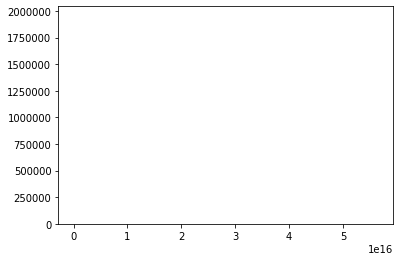

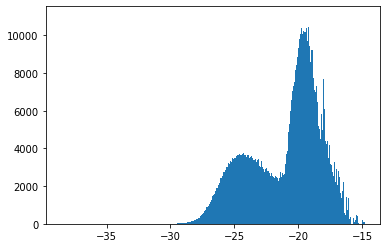

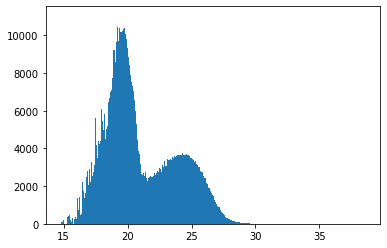

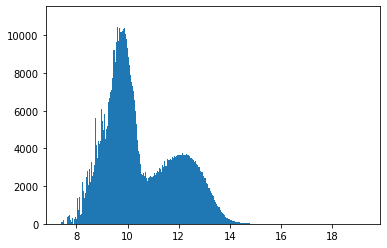

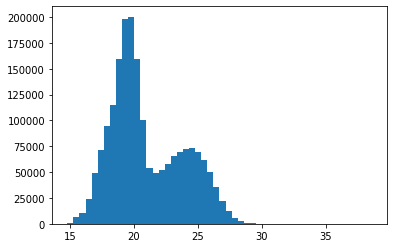

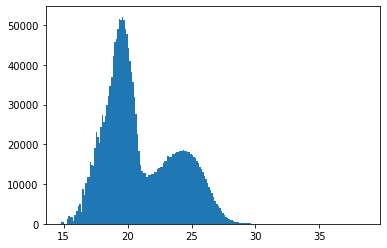

In [8]:
%matplotlib inline  
import matplotlib.pyplot as plt
plt.hist((df_cumulative['ELE_TOTAL_ENERGY_FLUX']),bins=1000);
plt.figure()
plt.hist(np.log(1/df_cumulative['ELE_TOTAL_ENERGY_FLUX']),bins=1000);
plt.figure()
plt.hist(np.log(df_cumulative['ELE_TOTAL_ENERGY_FLUX']),bins=1000);
plt.figure()
plt.hist(np.log(np.sqrt(df_cumulative['ELE_TOTAL_ENERGY_FLUX'])),bins=1000);
plt.figure()
plt.hist(np.log(df_cumulative['ELE_TOTAL_ENERGY_FLUX']),bins=50);
plt.figure()
plt.hist(np.log(df_cumulative['ELE_TOTAL_ENERGY_FLUX']),bins=200);

In [ ]:
plt.hist(np.log((df_cumulative['ELE_TOTAL_ENERGY_FLUX']))**4,bins=1000);
plt.figure()
plt.plot(np.log( 
    df_cumulative['ELE_TOTAL_ENERGY_FLUX'][0:df_cumulative.shape[0]-1])
    
         );
plt.figure()
plt.hist(np.log( 
    np.array(df_cumulative['ELE_TOTAL_ENERGY_FLUX'][1:]))
    -np.log(
        np.array(df_cumulative['ELE_TOTAL_ENERGY_FLUX'][0:df_cumulative.shape[0]-1]) )
         ,bins=1000);

In [ ]:
plt.figure()
plt.plot( (( np.log( 
    np.array(df_cumulative['ELE_TOTAL_ENERGY_FLUX'][1:]))
    -np.log(
        np.array((df_cumulative['ELE_TOTAL_ENERGY_FLUX'][0:df_cumulative.shape[0]-1]))) )**2)[:1000]);
plt.figure()
plt.plot(( (( np.log( 
    np.array(df_cumulative['ELE_TOTAL_ENERGY_FLUX'][1:]))
    -np.log(
        np.array((df_cumulative['ELE_TOTAL_ENERGY_FLUX'][0:df_cumulative.shape[0]-1]))) /np.log(
        np.array((df_cumulative['ELE_TOTAL_ENERGY_FLUX'][0:df_cumulative.shape[0]-1])))))**2)[:1000000]);

In [46]:
scaler = preprocessing.RobustScaler()
scaler =scaler.fit(df_cumulative.values)
vals_scaled = scaler.transform(df_cumulative)


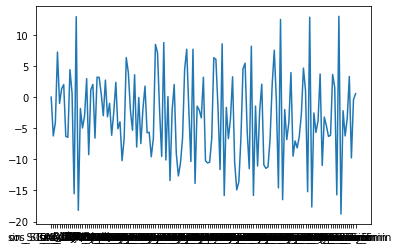

In [47]:
vals_scaled =  pd.DataFrame (vals_scaled, columns = df_cumulative.columns)
cov=vals_scaled.cov();
plt.plot(cov['ELE_TOTAL_ENERGY_FLUX'][2:])

In [48]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v

vals_scaled.corr(method=histogram_intersection);

In [49]:
# plt.figure(figsize=(20,20))
# corr = vals_scaled.corr(method=histogram_intersection)
# plt.plot(corr['ELE_TOTAL_ENERGY_FLUX'])

# plt.figure(figsize=(20,20))
# corr = vals_scaled.corr(method='pearson')
# plt.plot(corr['ELE_TOTAL_ENERGY_FLUX'][2:])

In [50]:
y=np.array(vals_scaled['ELE_TOTAL_ENERGY_FLUX'],dtype=np.float32)
x=np.array(vals_scaled[['SC_AACGM_LAT',
 'sin_ut',
 'cos_ut',
 'sin_doy',
 'cos_doy',
 'sin_SC_AACGM_LTIME',
 'cos_SC_AACGM_LTIME',
 'F107',
 'Bz',
 'By',
 'Bx',
 'AE',
 'AL',
 'AU',
 'SymH',
 'PC',
 'vsw',
 'vx',
 'psw',
 'borovsky',
 'newell']].copy(deep=True),dtype=np.float32)
x= np.transpose(x)
plt.figure(figsize=(20,20))
corr = vals_scaled[['ELE_TOTAL_ENERGY_FLUX',
 'F107',
 'Bz',
 'By',
 'Bx',
 'AE',
 'AL',
 'AU',
 'SymH',
 'PC',
 'vsw',
 'vx',
 'psw',
 'borovsky',
 'newell']].corr(method='pearson')
print(corr)


                       ELE_TOTAL_ENERGY_FLUX      F107        Bz        By  \
ELE_TOTAL_ENERGY_FLUX               1.000000 -0.001327 -0.001093  0.000910   
F107                               -0.001327  1.000000  0.102552 -0.002168   
Bz                                 -0.001093  0.102552  1.000000 -0.002309   
By                                  0.000910 -0.002168 -0.002309  1.000000   
Bx                                  0.000144  0.053662  0.059118 -0.010384   
AE                                 -0.002481  0.059964 -0.315519  0.004877   
AL                                  0.001833 -0.022982  0.293008 -0.007848   
AU                                 -0.002959  0.113094 -0.263256 -0.002343   
SymH                               -0.000325 -0.060728  0.153373 -0.005535   
PC                                 -0.000111  0.002661 -0.051590  0.001155   
vsw                                -0.000561 -0.020980  0.166145  0.004088   
vx                                  0.000551  0.023035 -0.163434

<Figure size 1440x1440 with 0 Axes>

In [51]:

for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if corr.iloc[i,j] < 0.2 or corr.iloc[i,j] == 1:
            corr.iloc[i,j] = 0

print(corr)

                       ELE_TOTAL_ENERGY_FLUX  F107        Bz   By   Bx  \
ELE_TOTAL_ENERGY_FLUX                    0.0   0.0  0.000000  0.0  0.0   
F107                                     0.0   0.0  0.000000  0.0  0.0   
Bz                                       0.0   0.0  0.000000  0.0  0.0   
By                                       0.0   0.0  0.000000  0.0  0.0   
Bx                                       0.0   0.0  0.000000  0.0  0.0   
AE                                       0.0   0.0  0.000000  0.0  0.0   
AL                                       0.0   0.0  0.293008  0.0  0.0   
AU                                       0.0   0.0  0.000000  0.0  0.0   
SymH                                     0.0   0.0  0.000000  0.0  0.0   
PC                                       0.0   0.0  0.000000  0.0  0.0   
vsw                                      0.0   0.0  0.000000  0.0  0.0   
vx                                       0.0   0.0  0.000000  0.0  0.0   
psw                                   

In [52]:
corr = vals_scaled[['ELE_TOTAL_ENERGY_FLUX', 'F107', 'Bz', 'By', 'Bx', 'AE',
 'AL', 'AU', 'SymH', 'PC', 'vsw', 'vx', 'psw', 'borovsky', 'newell']].corr(method='spearman')

for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if corr.iloc[i,j] < 0.2 or corr.iloc[i,j] == 1:
            corr.iloc[i,j] = 0
print(corr)

                       ELE_TOTAL_ENERGY_FLUX  F107       Bz   By   Bx  \
ELE_TOTAL_ENERGY_FLUX                    0.0   0.0  0.00000  0.0  0.0   
F107                                     0.0   0.0  0.00000  0.0  0.0   
Bz                                       0.0   0.0  0.00000  0.0  0.0   
By                                       0.0   0.0  0.00000  0.0  0.0   
Bx                                       0.0   0.0  0.00000  0.0  0.0   
AE                                       0.0   0.0  0.00000  0.0  0.0   
AL                                       0.0   0.0  0.34204  0.0  0.0   
AU                                       0.0   0.0  0.00000  0.0  0.0   
SymH                                     0.0   0.0  0.00000  0.0  0.0   
PC                                       0.0   0.0  0.00000  0.0  0.0   
vsw                                      0.0   0.0  0.00000  0.0  0.0   
vx                                       0.0   0.0  0.00000  0.0  0.0   
psw                                      0.0   0.0 

In [53]:
corr = vals_scaled[['ELE_TOTAL_ENERGY_FLUX', 'F107', 'Bz', 'By', 'Bx', 'AE',
 'AL', 'AU', 'SymH', 'PC', 'vsw', 'vx', 'psw', 'borovsky', 'newell']].corr(method='kendall')

for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if corr.iloc[i,j] < 0.2 or corr.iloc[i,j] == 1:
            corr.iloc[i,j] = 0
print(corr)

                       ELE_TOTAL_ENERGY_FLUX  F107        Bz   By   Bx  \
ELE_TOTAL_ENERGY_FLUX                    0.0   0.0  0.000000  0.0  0.0   
F107                                     0.0   0.0  0.000000  0.0  0.0   
Bz                                       0.0   0.0  0.000000  0.0  0.0   
By                                       0.0   0.0  0.000000  0.0  0.0   
Bx                                       0.0   0.0  0.000000  0.0  0.0   
AE                                       0.0   0.0  0.000000  0.0  0.0   
AL                                       0.0   0.0  0.232757  0.0  0.0   
AU                                       0.0   0.0  0.000000  0.0  0.0   
SymH                                     0.0   0.0  0.000000  0.0  0.0   
PC                                       0.0   0.0  0.000000  0.0  0.0   
vsw                                      0.0   0.0  0.000000  0.0  0.0   
vx                                       0.0   0.0  0.000000  0.0  0.0   
psw                                   

In [54]:
sum_y_squared = np.sum(y*y)
sum_x_squared = np.zeros((x.shape[0]),np.float32)
corr_zero_lag = np.zeros((x.shape[0]),np.float32)
for i in range(0,21):
    sum_x_squared[i] = np.sum(x[i,:]*x[i,:])
    corr_zero_lag[i]=np.array(np.correlate(x[i,:],y)/np.sqrt(sum_x_squared[i]*sum_y_squared),dtype=np.float32)
    


In [55]:
from scipy.stats import wilcoxon, kruskal,friedmanchisquare
names=['ELE_TOTAL_ENERGY_FLUX', 'F107', 'Bz', 'By', 'Bx', 'AE',
 'AL', 'AU', 'SymH', 'PC', 'vsw', 'vx', 'psw', 'borovsky', 'newell']
for i in range(len(names)):
    for j in range(len(names)):
        if i != j:
            stat, p = wilcoxon(vals_scaled[names[i]], vals_scaled[names[j]])
            if np.abs(p) > 1e-6:
                print('willcoxon',names[i], names[j], p)

willcoxon psw newell 0.024877279982057042
willcoxon newell psw 0.024877279982057042


In [56]:
                    
for i in range(len(names)):
    for j in range(len(names)):
            for k in range(len(names)):                
                if i != j and j!=k and k!=i:
                    #friedmanchisquare is too slow
                    #stat, p = friedmanchisquare(vals_scaled[names[i]], vals_scaled[names[j]],vals_scaled[names[k]])
                    #if np.abs(p)>0:#1e-6:
                    #print('friedmanchisquare',names[i], names[j],names[k], p) 
                    stat, p = kruskal(vals_scaled[names[i]], vals_scaled[names[j]],vals_scaled[names[k]])
                    if np.abs(p) > 0:#1e-6:
                        print('kruskal',names[i], names[j],names[k], p) 

kruskal Bz By Bx 5.070335186502779e-126
kruskal Bz By SymH 1.275182585780815e-156
kruskal Bz Bx By 5.070335186502779e-126
kruskal Bz Bx SymH 1.0693998954675598e-116
kruskal Bz SymH By 1.275182585780815e-156
kruskal Bz SymH Bx 1.0693998954675598e-116
kruskal By Bz Bx 5.070335186502779e-126
kruskal By Bz SymH 1.275182585780815e-156
kruskal By Bx Bz 5.070335186502779e-126
kruskal By Bx SymH 2.3570596105819017e-38
kruskal By SymH Bz 1.275182585780815e-156
kruskal By SymH Bx 2.3570596105819017e-38
kruskal Bx Bz By 5.070335186502779e-126
kruskal Bx Bz SymH 1.0693998954675598e-116
kruskal Bx By Bz 5.070335186502779e-126
kruskal Bx By SymH 2.3570596105819017e-38
kruskal Bx SymH Bz 1.0693998954675598e-116
kruskal Bx SymH By 2.3570596105819017e-38
kruskal SymH Bz By 1.275182585780815e-156
kruskal SymH Bz Bx 1.0693998954675598e-116
kruskal SymH By Bz 1.275182585780815e-156
kruskal SymH By Bx 2.3570596105819017e-38
kruskal SymH Bx Bz 1.0693998954675598e-116
kruskal SymH Bx By 2.3570596105819017e-3

In [57]:
# xxx=np.array([1,2,3,4,5,6])
# print(np.roll(xxx,1))
# print(np.roll(xxx,0))
names=['SC_AACGM_LAT', 'sin_ut', 'cos_ut', 'sin_doy', 'cos_doy', 'sin_SC_AACGM_LTIME', 'cos_SC_AACGM_LTIME',
  'F107', 'Bz', 'By', 'Bx', 'AE', 'AL', 'AU', 'SymH', 'PC', 'vsw', 'vx', 'psw', 'borovsky', 'newell'];

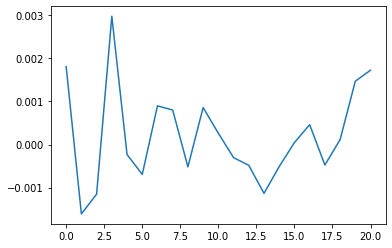

In [58]:
plt.plot(corr_zero_lag)

In [59]:
sum_y_squared = np.sum(y*y)
sum_x_squared = np.zeros((x.shape[0]),np.float32)
cross_cor = np.zeros((x.shape[0],2400),np.float32)
for i in range(0,21):
    sum_x_squared[i] = np.sum(x[i,:]*x[i,:])
    
for i in range(0,21):
    for j in range(0,cross_cor.shape[1]):
        cross_cor[i,j]=np.array(np.correlate(np.roll(x[i,:],j),y)/np.sqrt(sum_x_squared[i]*sum_y_squared),dtype=np.float32)
    

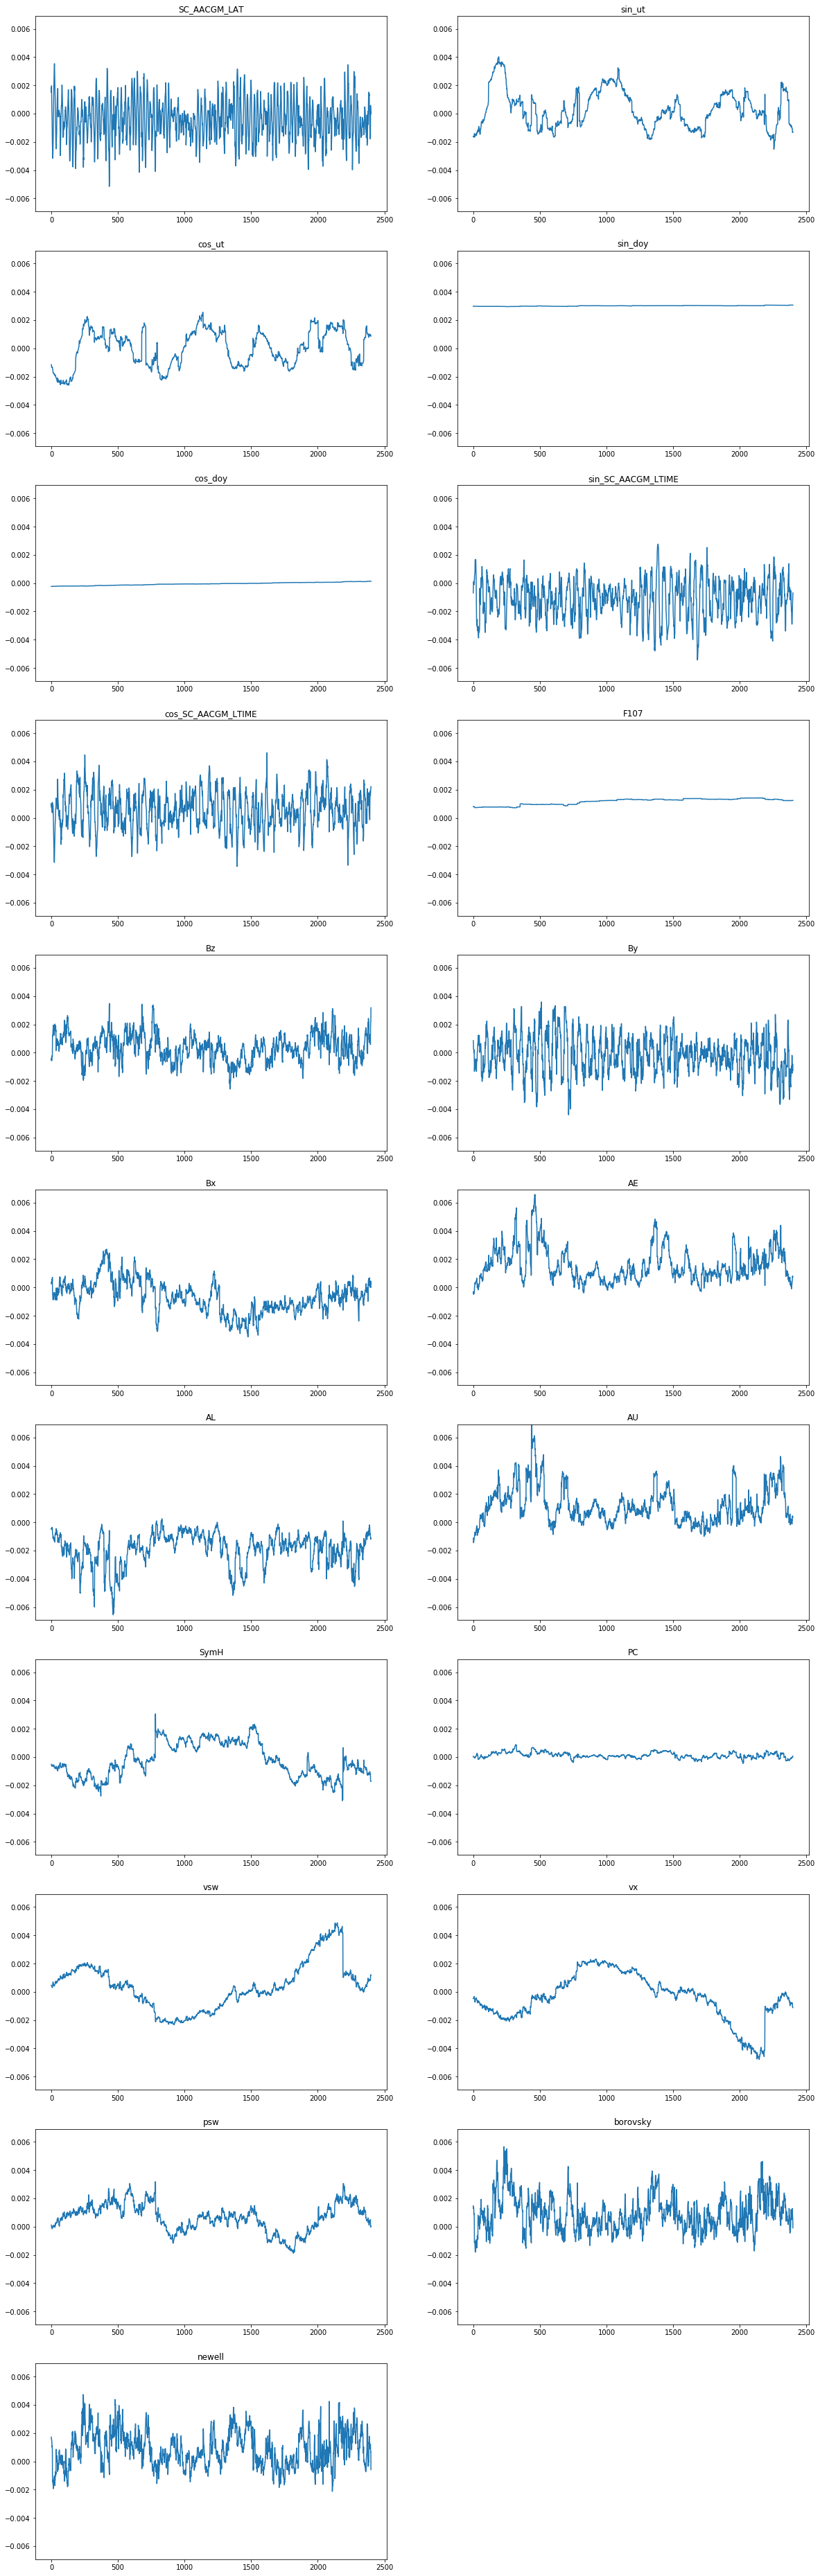

In [60]:
fig = plt.figure(figsize=(20,80))
figscale= np.max(np.max(cross_cor))
for i in range(0,21):
    plt.subplot(13,2,int(i+1))     
    plt.plot(cross_cor[i,:])
    plt.title(names[i])
    plt.ylim(-figscale,figscale)


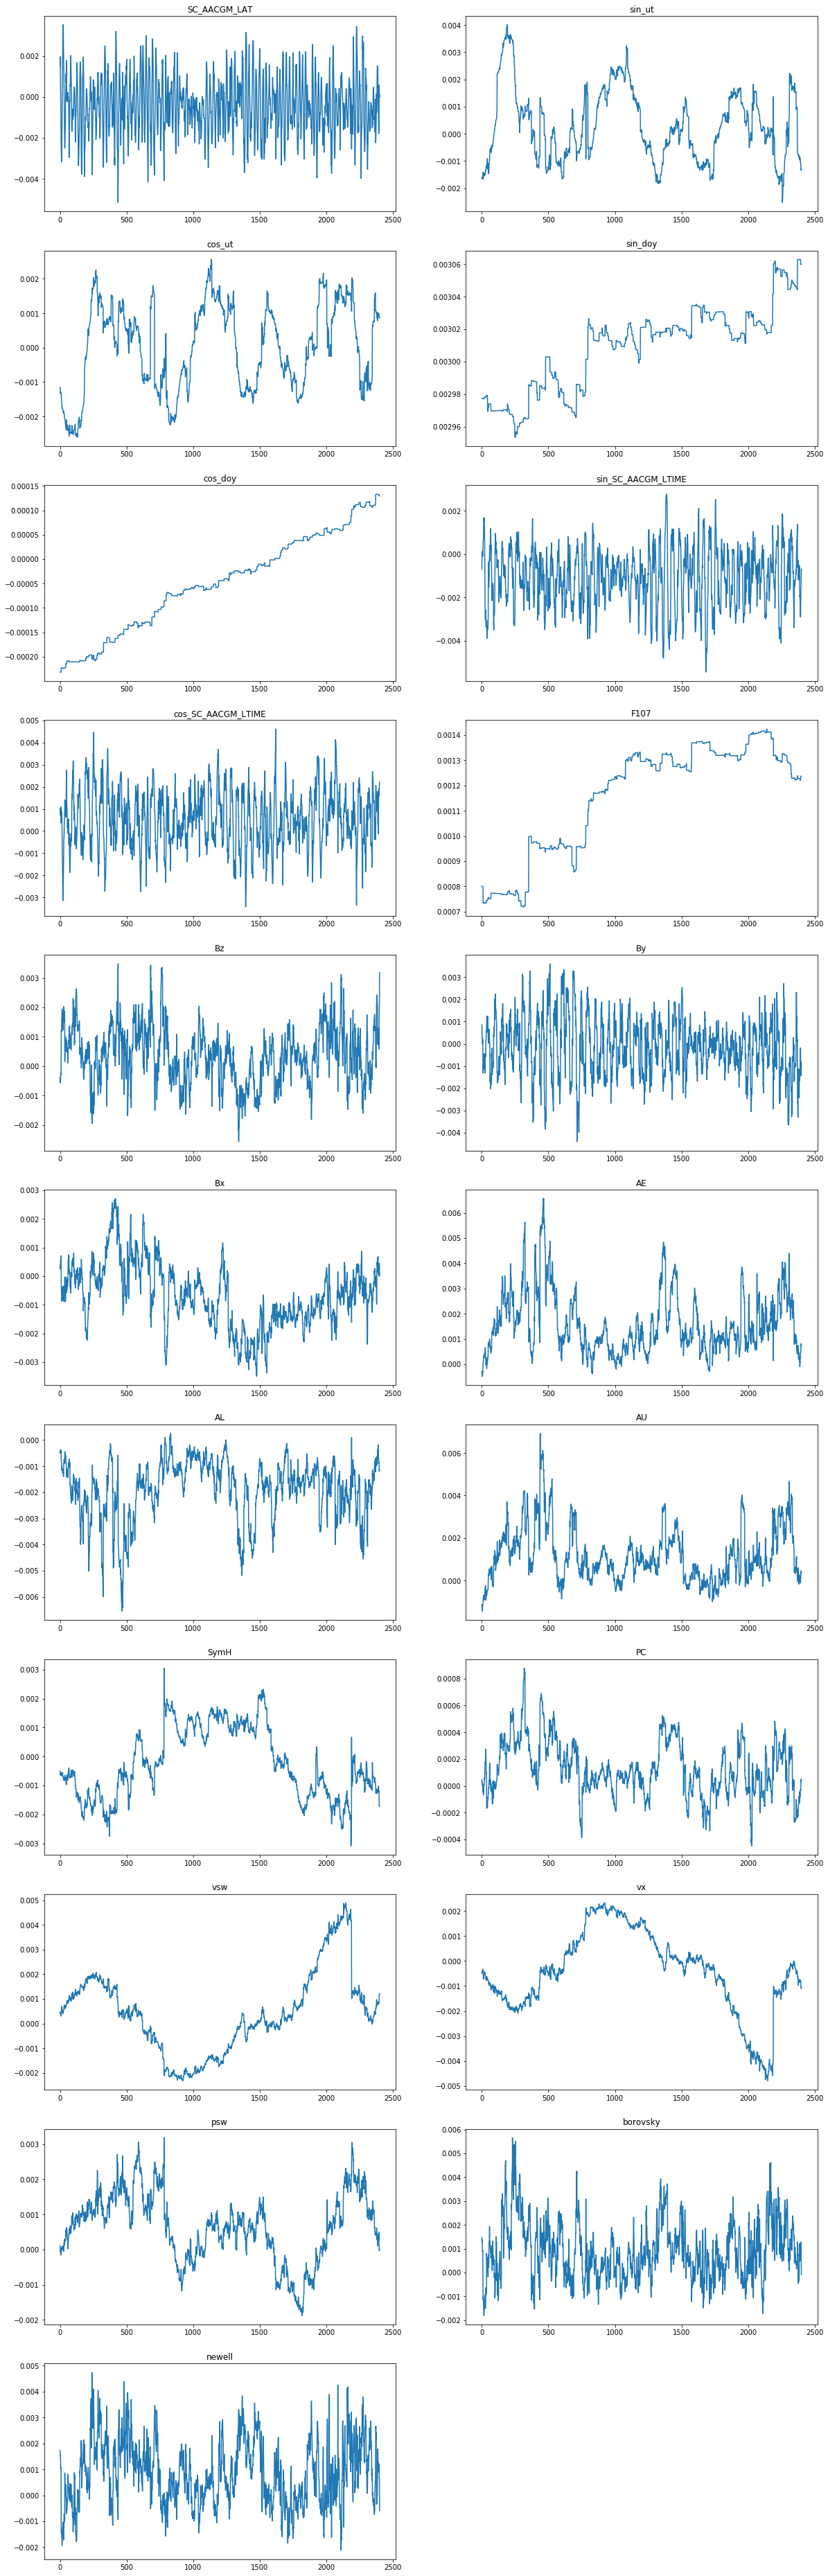

In [61]:
fig = plt.figure(figsize=(20,80))
for i in range(0,21):
    plt.subplot(13,2,int(i+1))     
    plt.plot(cross_cor[i,:])
    plt.title(names[i])

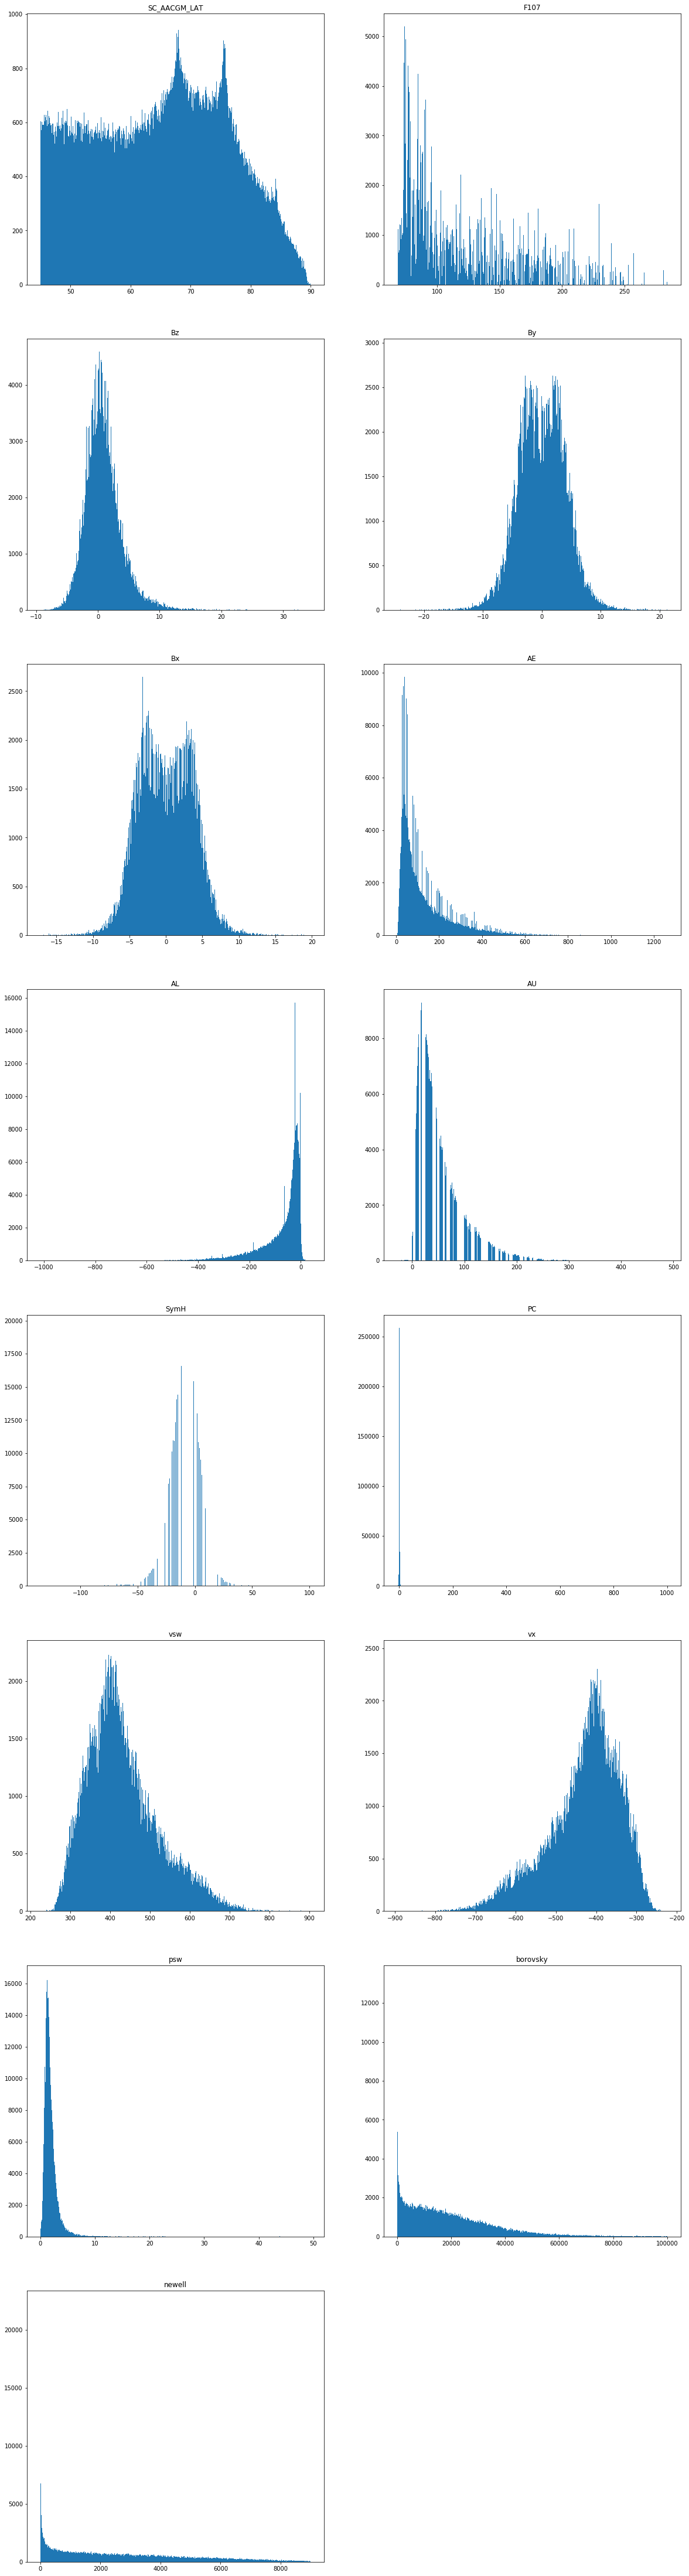

In [62]:
names=['SC_AACGM_LAT',   'F107', 'Bz', 'By', 'Bx', 'AE', 'AL', 'AU', 'SymH', 'PC', 'vsw', 'vx', 'psw', 'borovsky', 'newell'];
fig = plt.figure(figsize=(20,80))
for i in range(0,15):
    plt.subplot(8,2,int(i+1))     
    plt.hist(df_cumulative[names[i]],1000)
    plt.title(names[i])

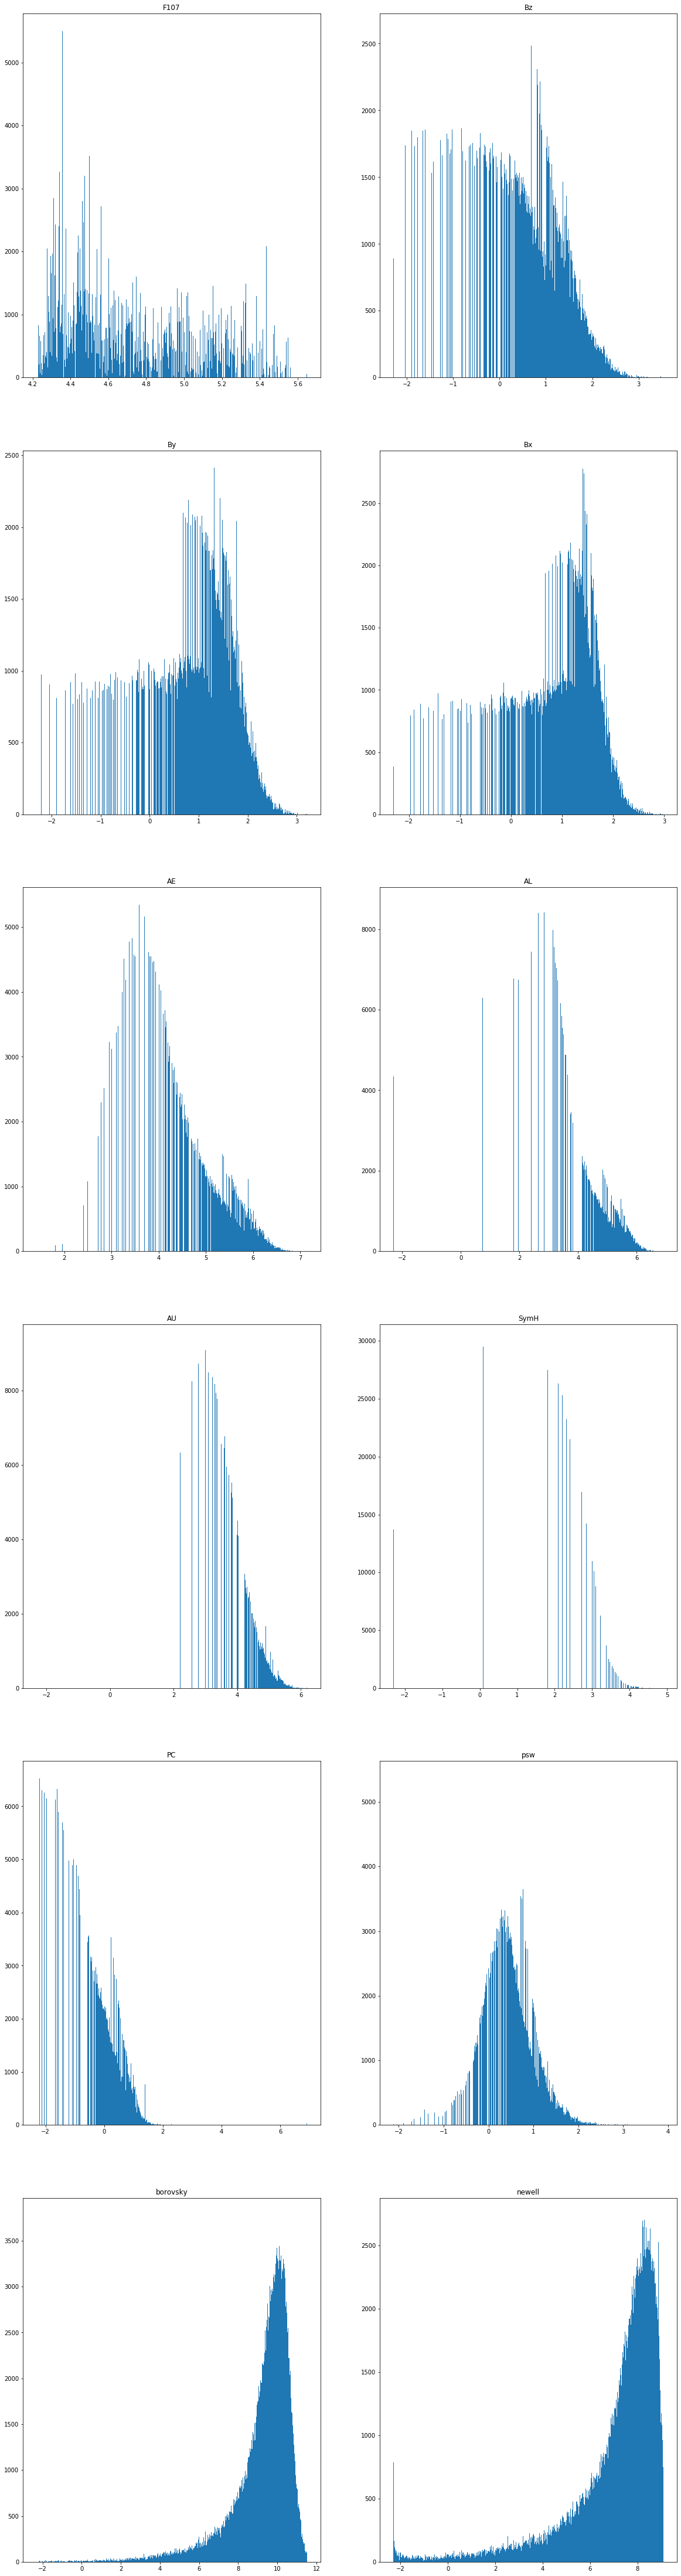

In [63]:
names=[   'F107', 'Bz', 'By', 'Bx', 'AE', 'AL', 'AU', 'SymH', 'PC',  'psw', 'borovsky', 'newell'];
fig = plt.figure(figsize=(20,80))
for i in range(0,12):
    plt.subplot(6,2,int(i+1))     
    plt.hist(np.log(np.abs(df_cumulative[names[i]])+.1),1000)
    plt.title(names[i])

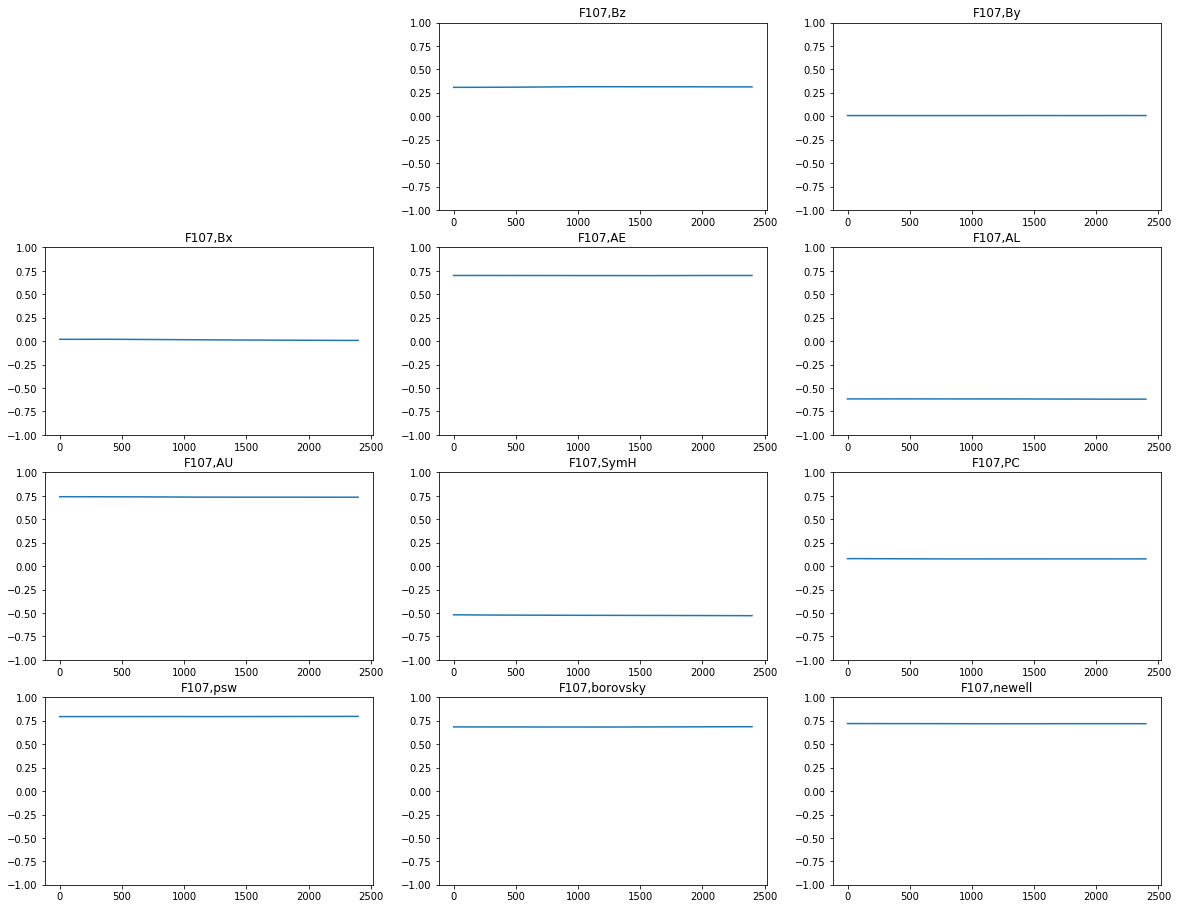

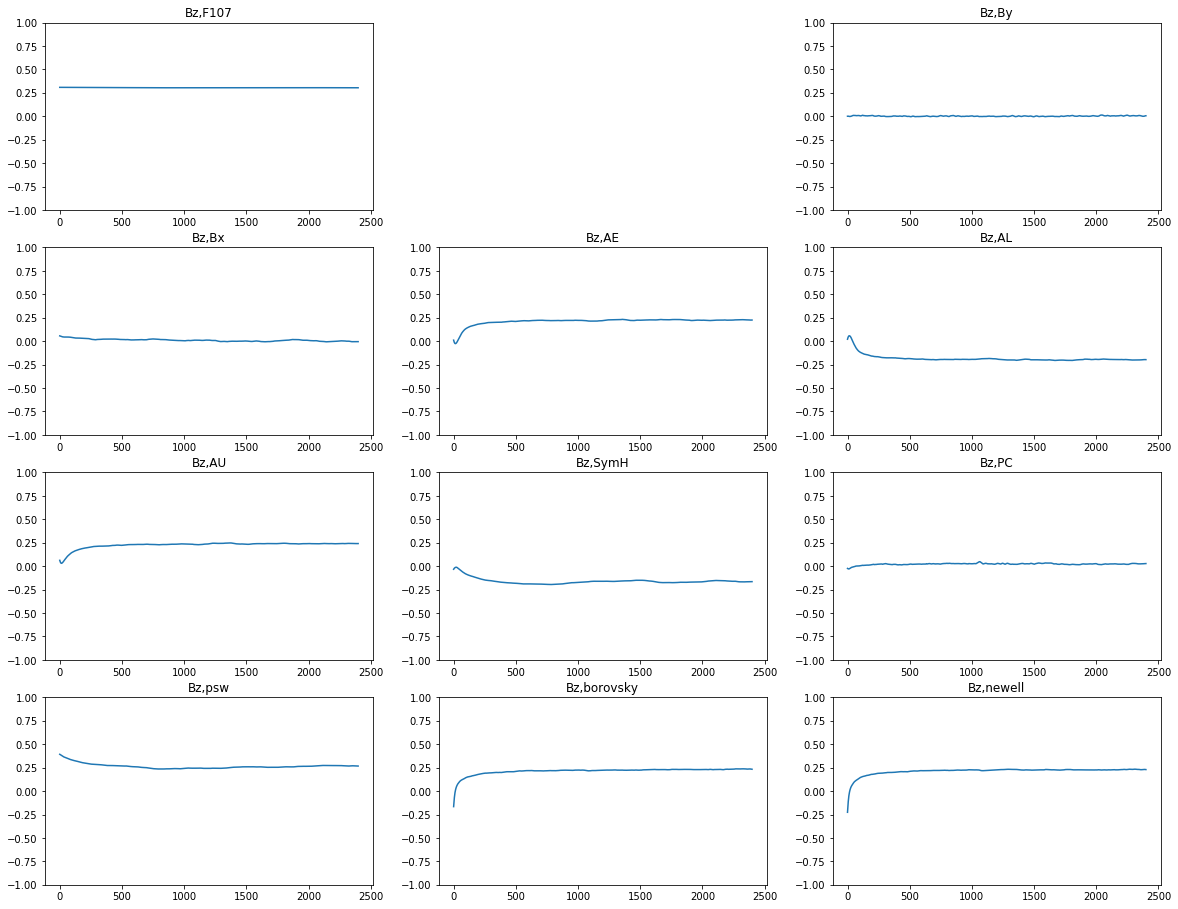

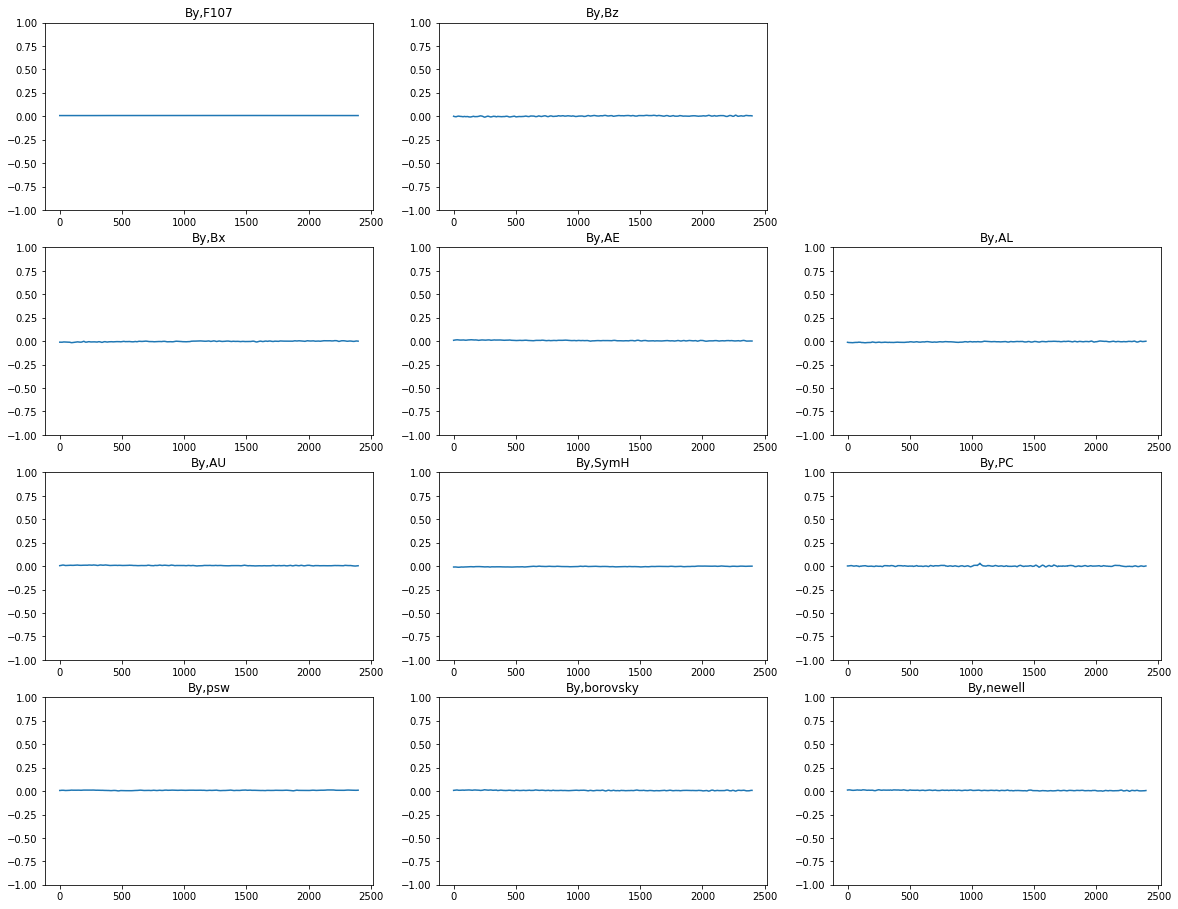

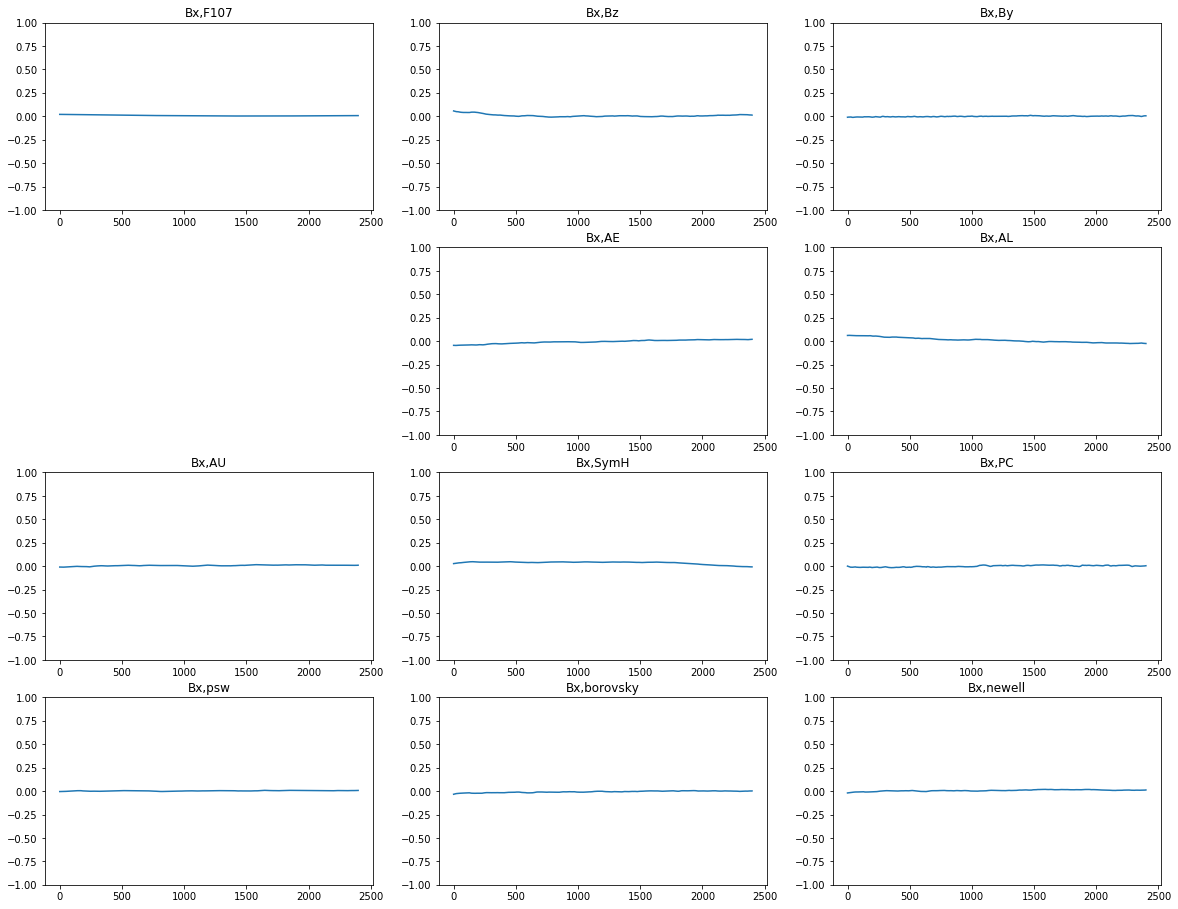

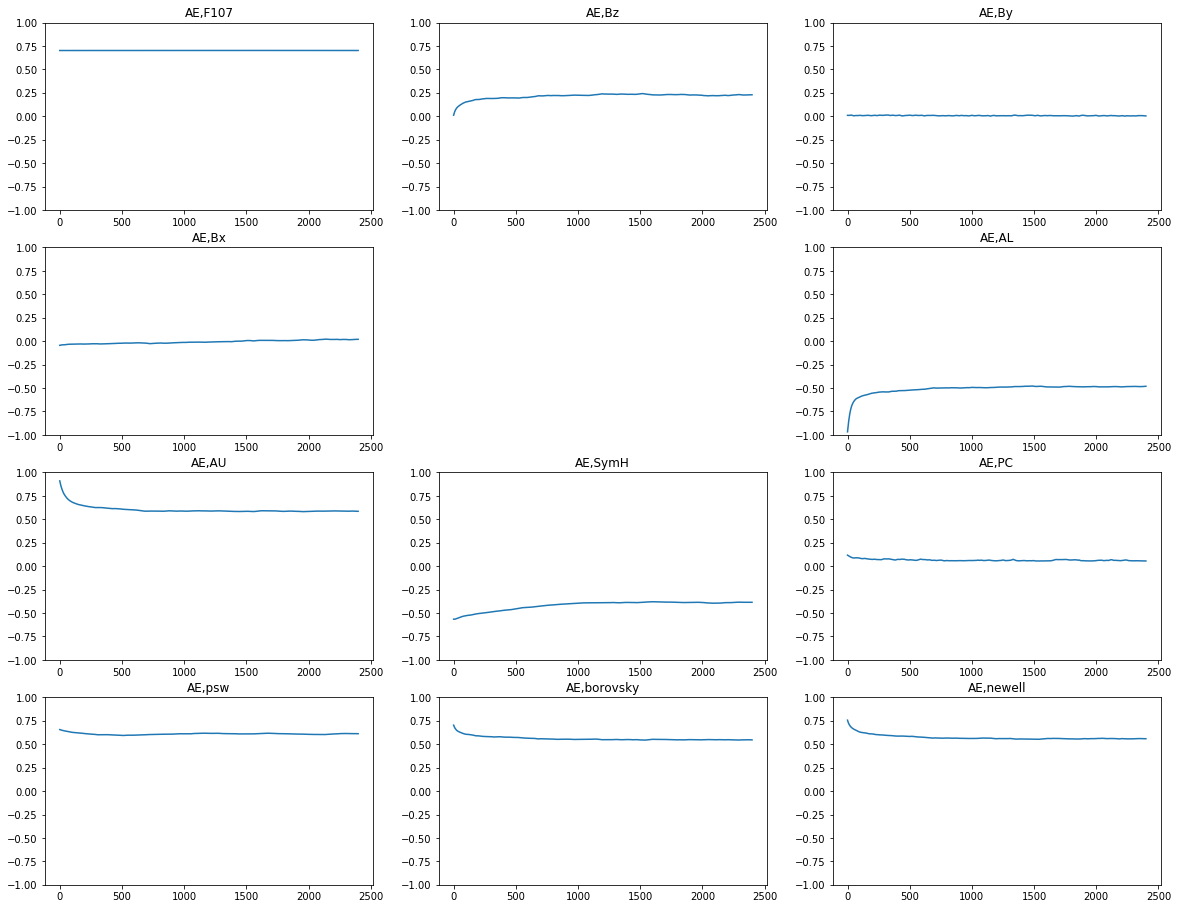

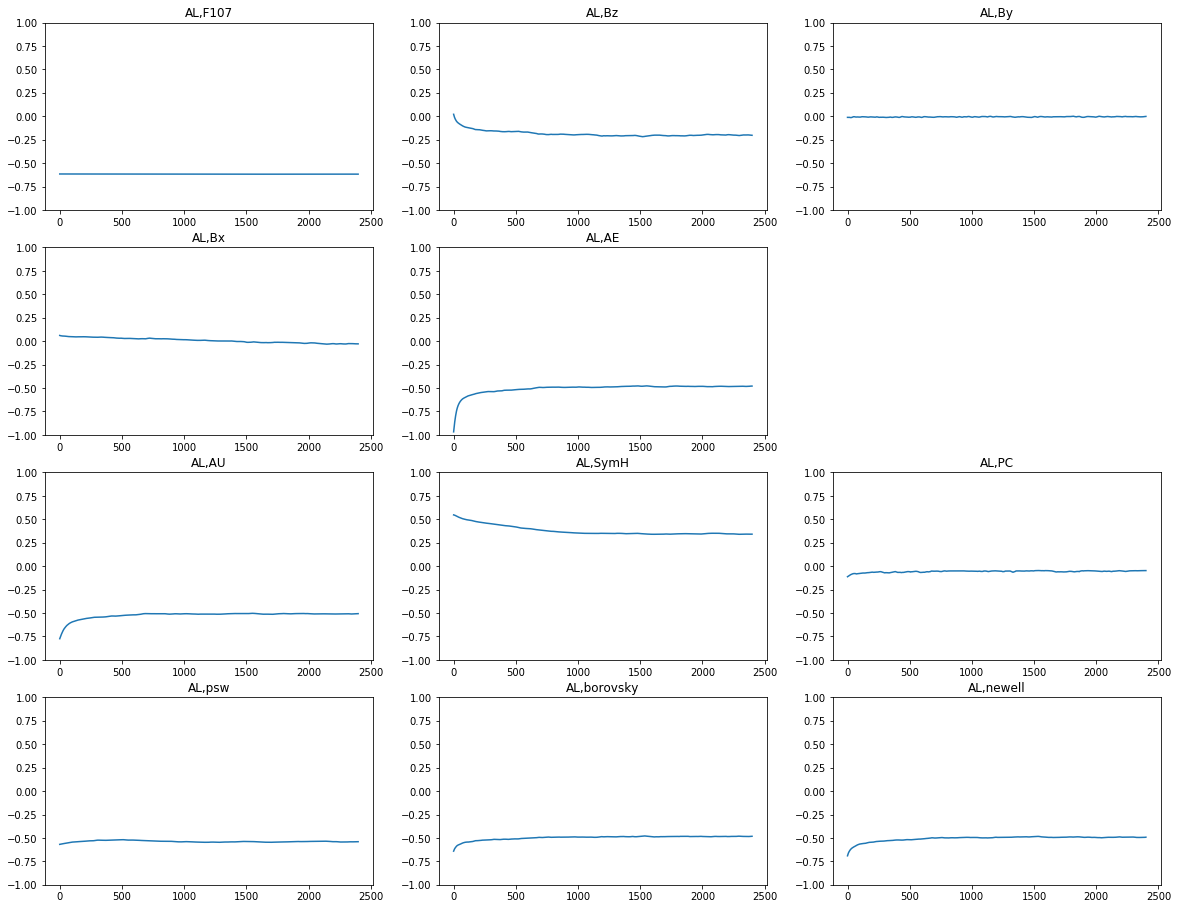

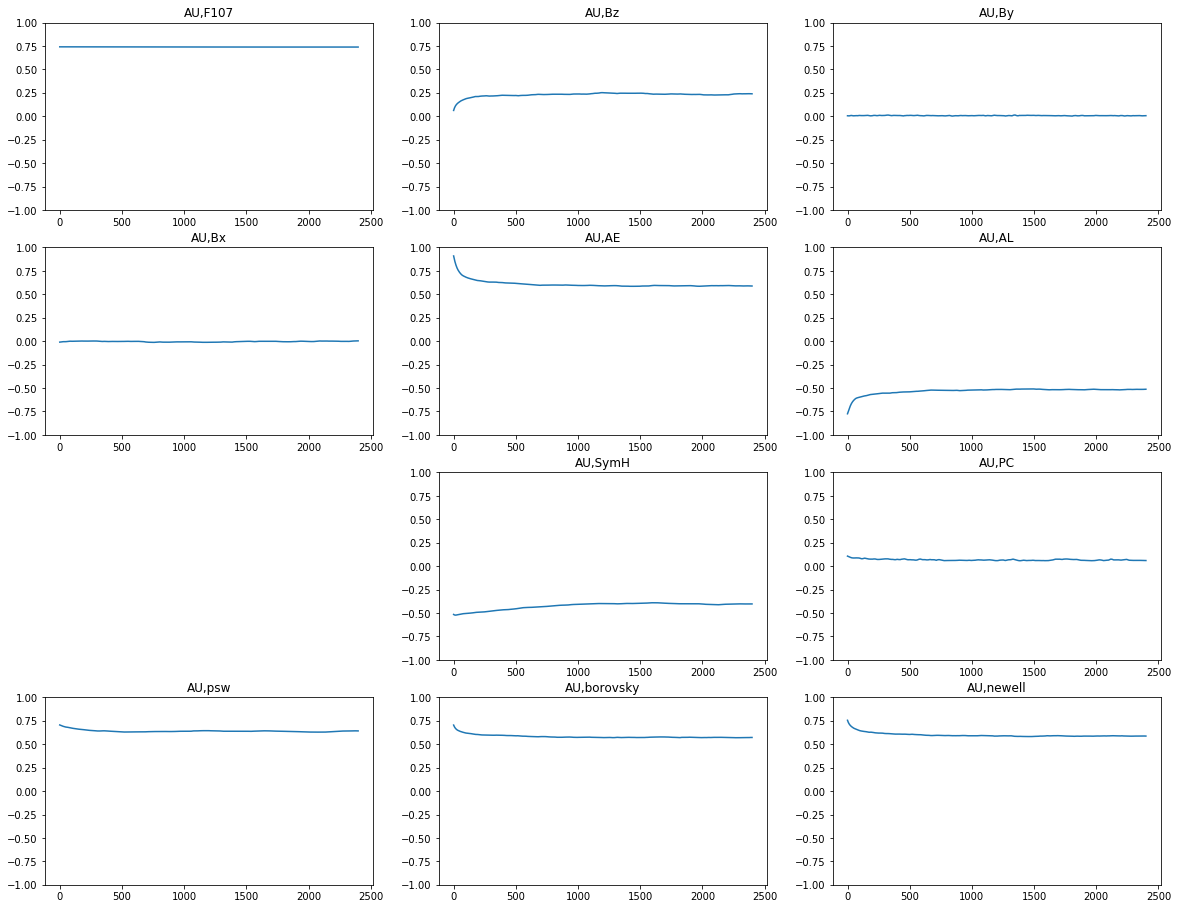

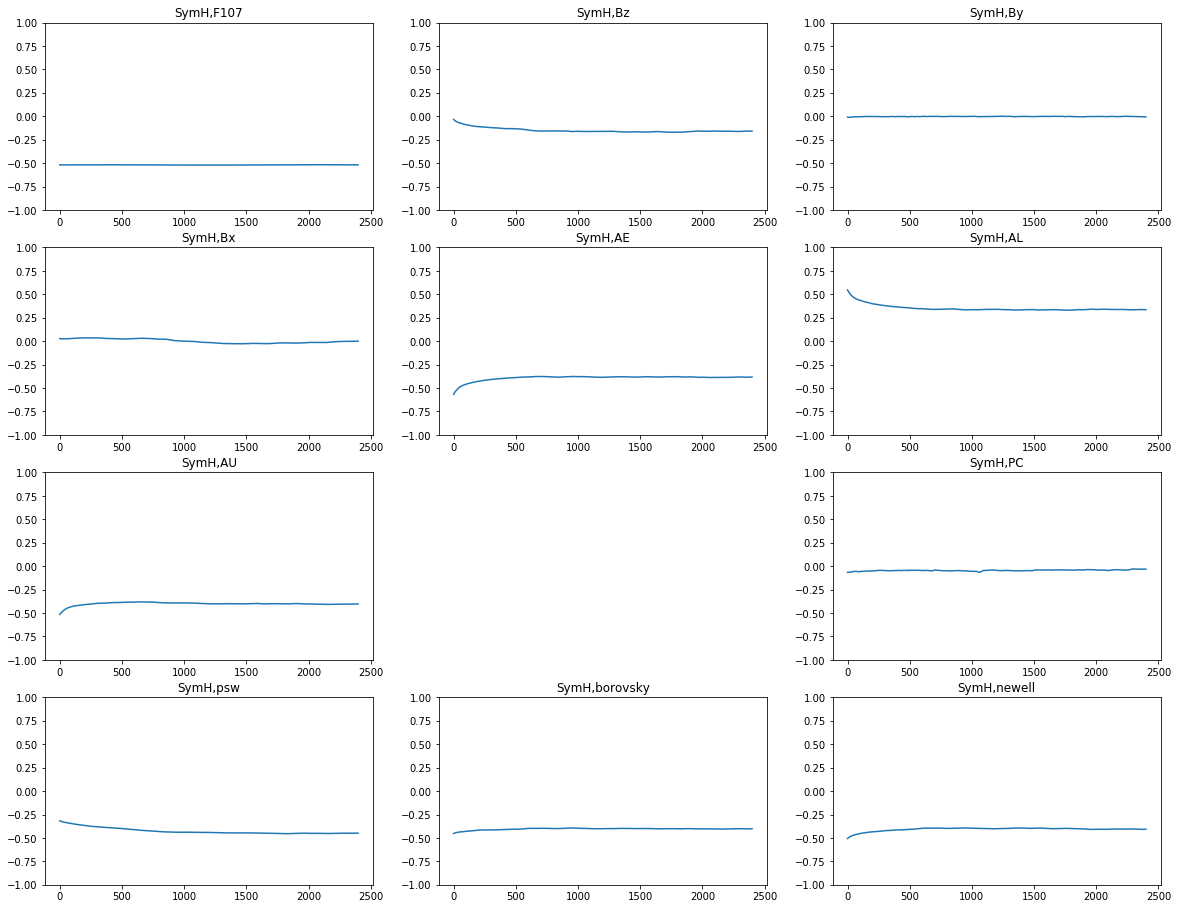

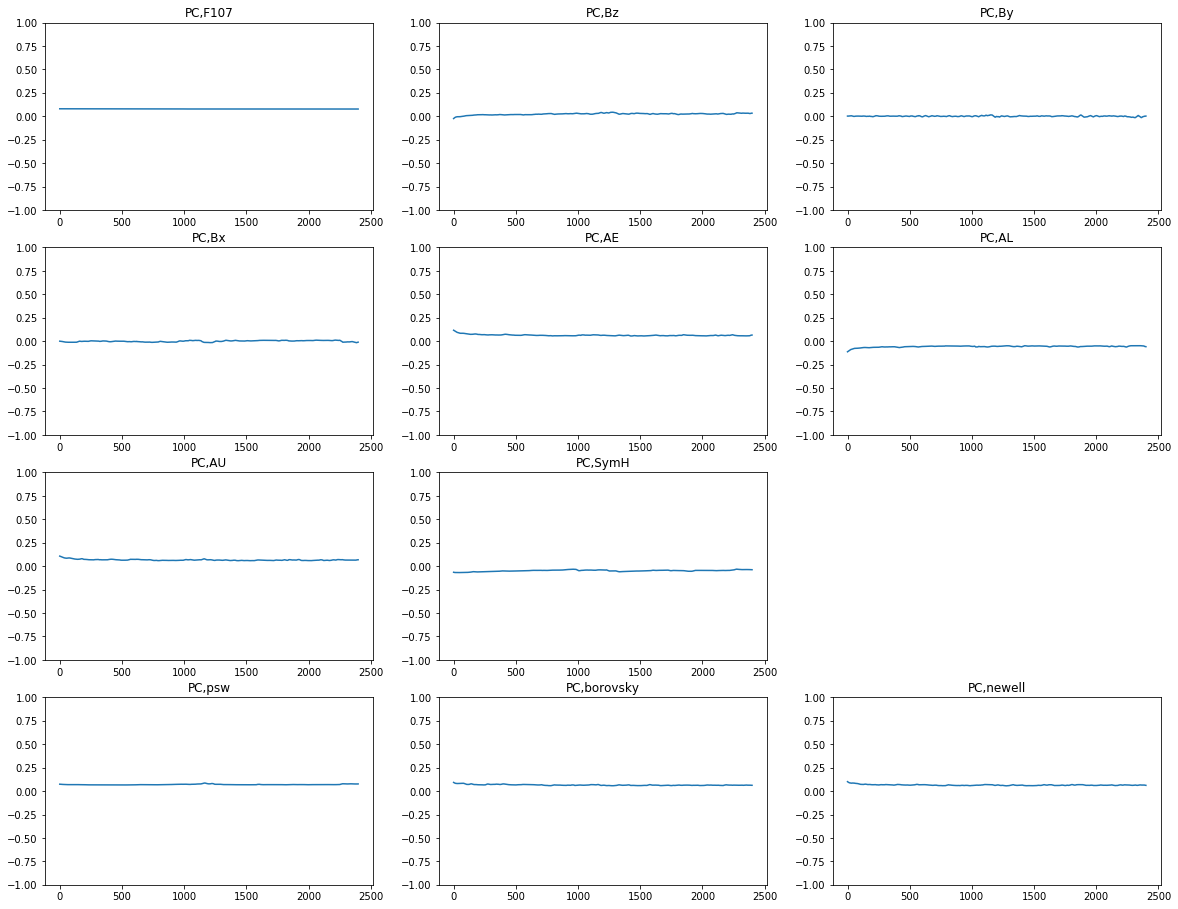

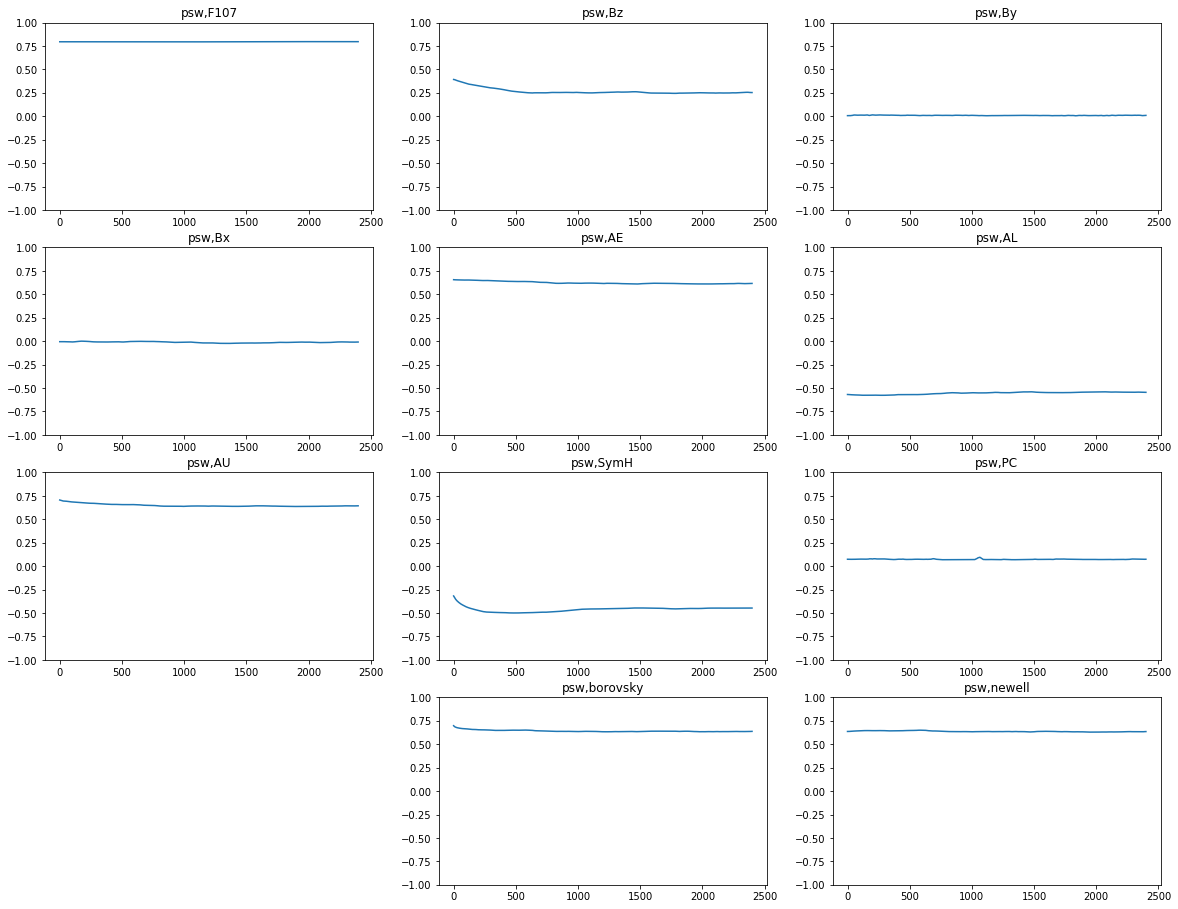

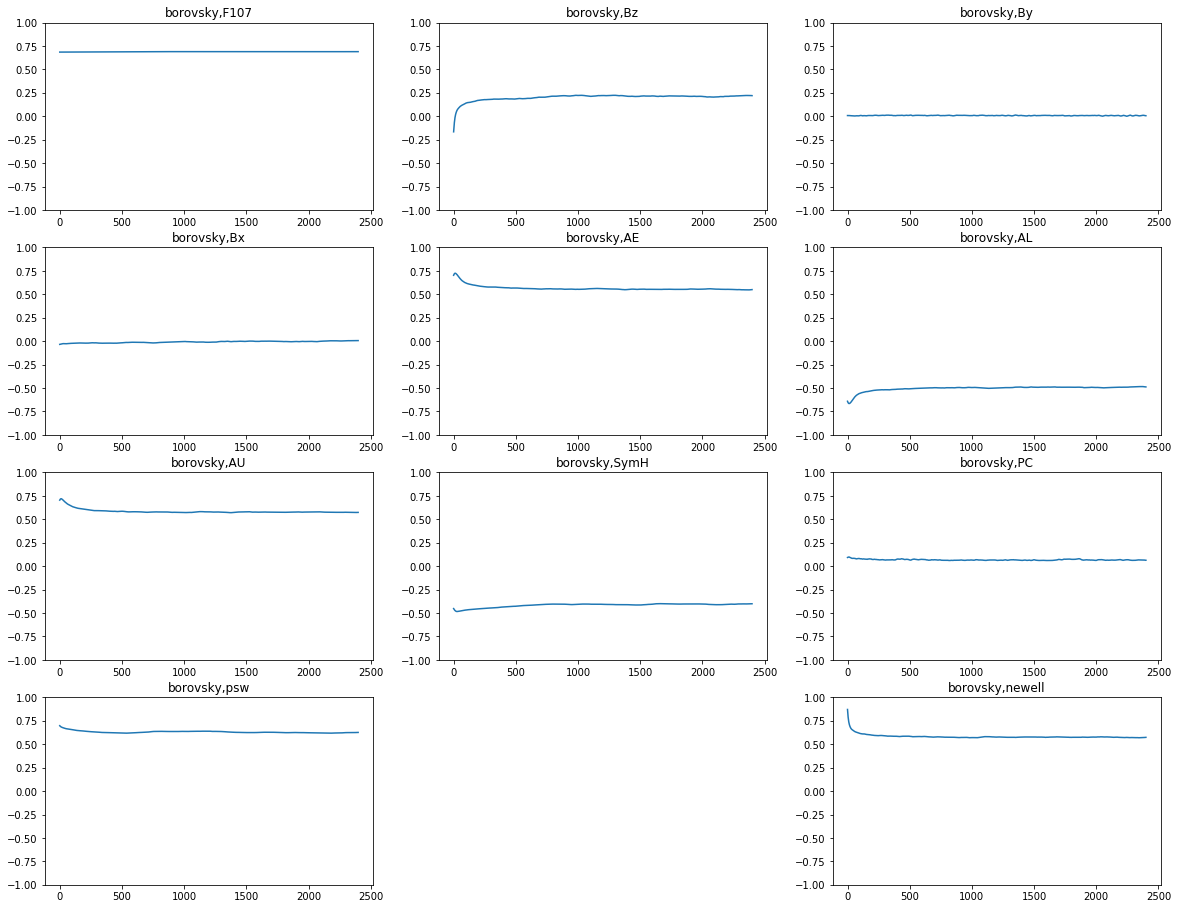

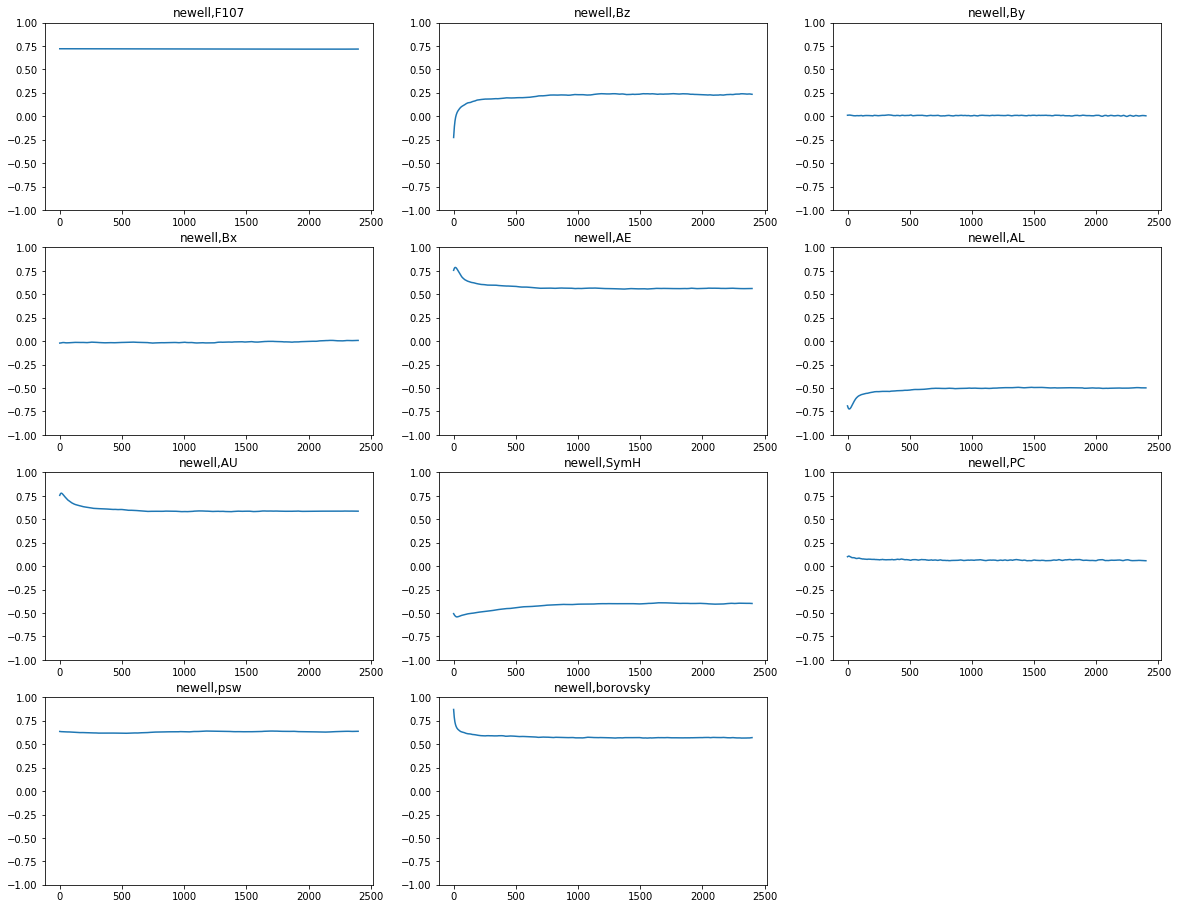

In [64]:
names=[   'F107', 'Bz', 'By', 'Bx', 'AE', 'AL', 'AU', 'SymH', 'PC',  'psw', 'borovsky', 'newell'];

sum_x_squared = np.zeros((len(names)),np.float32)
cross_cor = np.zeros((len(names),len(names),2400),np.float32)
for i in range(len(names)):
    sum_x_squared[i] = np.sum(df_cumulative[names[i]]*df_cumulative[names[i]])
    
for i in range(len(names)):
    for j in range(len(names)):
        for k in range(0,cross_cor.shape[2]):
                if i != j:
                    cross_cor[i,j,k]=np.array(
                        np.correlate(
                            np.roll(df_cumulative[names[i]],k) , df_cumulative[names[j]]
                                    ) /
                                np.sqrt(sum_x_squared[i]*sum_x_squared[j])
                                            ,dtype=np.float32)


for m in range(len(names)):
    fig = plt.figure(figsize=(20,20))
    for i in range(len(names)):
        if m!=i:
            plt.subplot(5,3,int(i+1))     
            plt.plot(cross_cor[m,i,:])
            plt.title(names[m]+','+names[i])
            plt.ylim(-1,1)


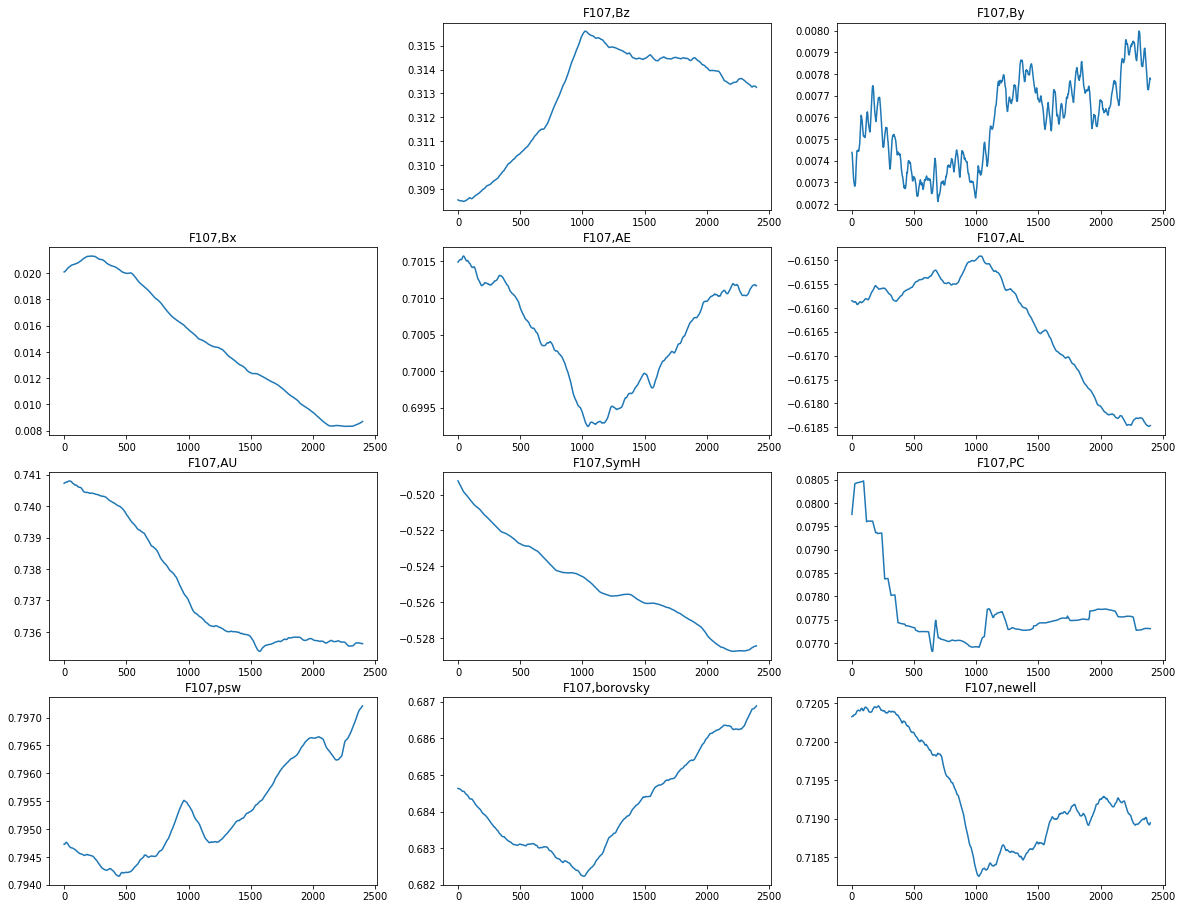

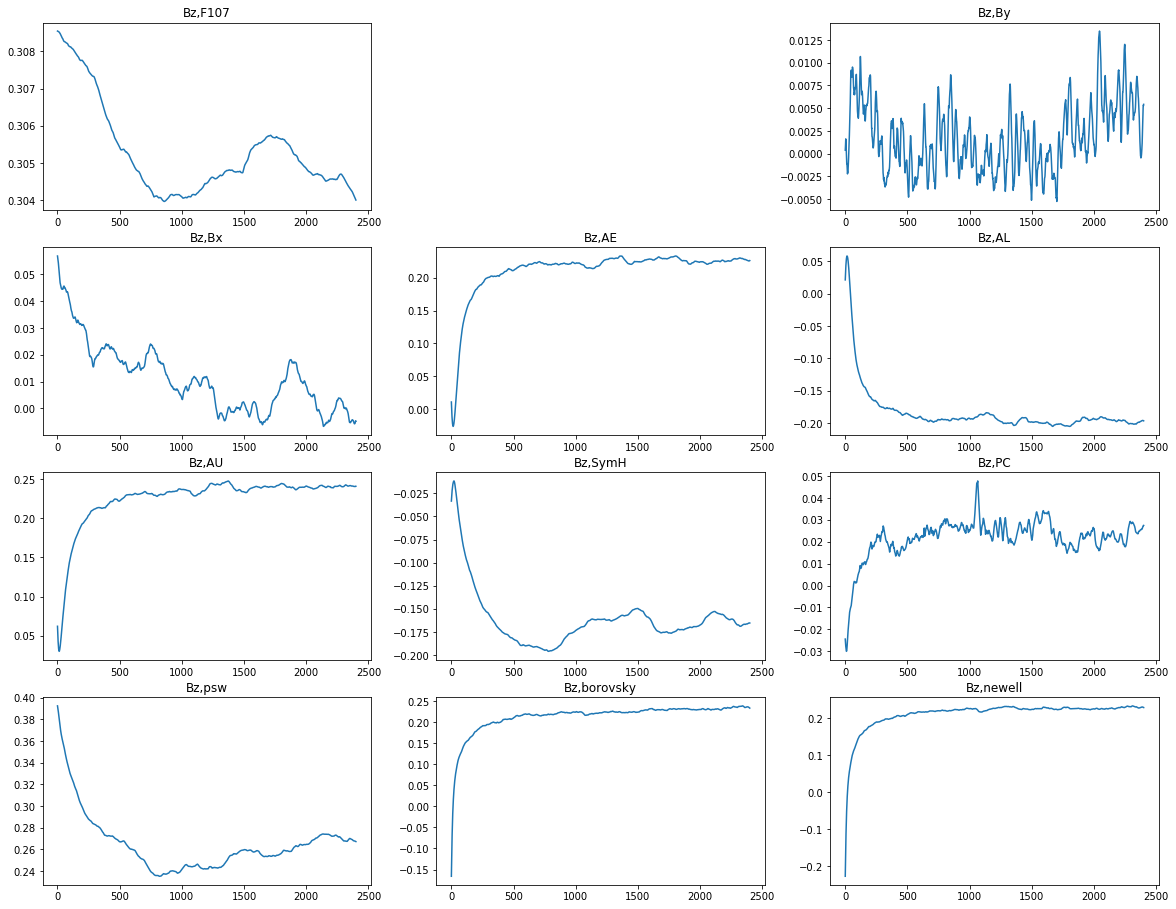

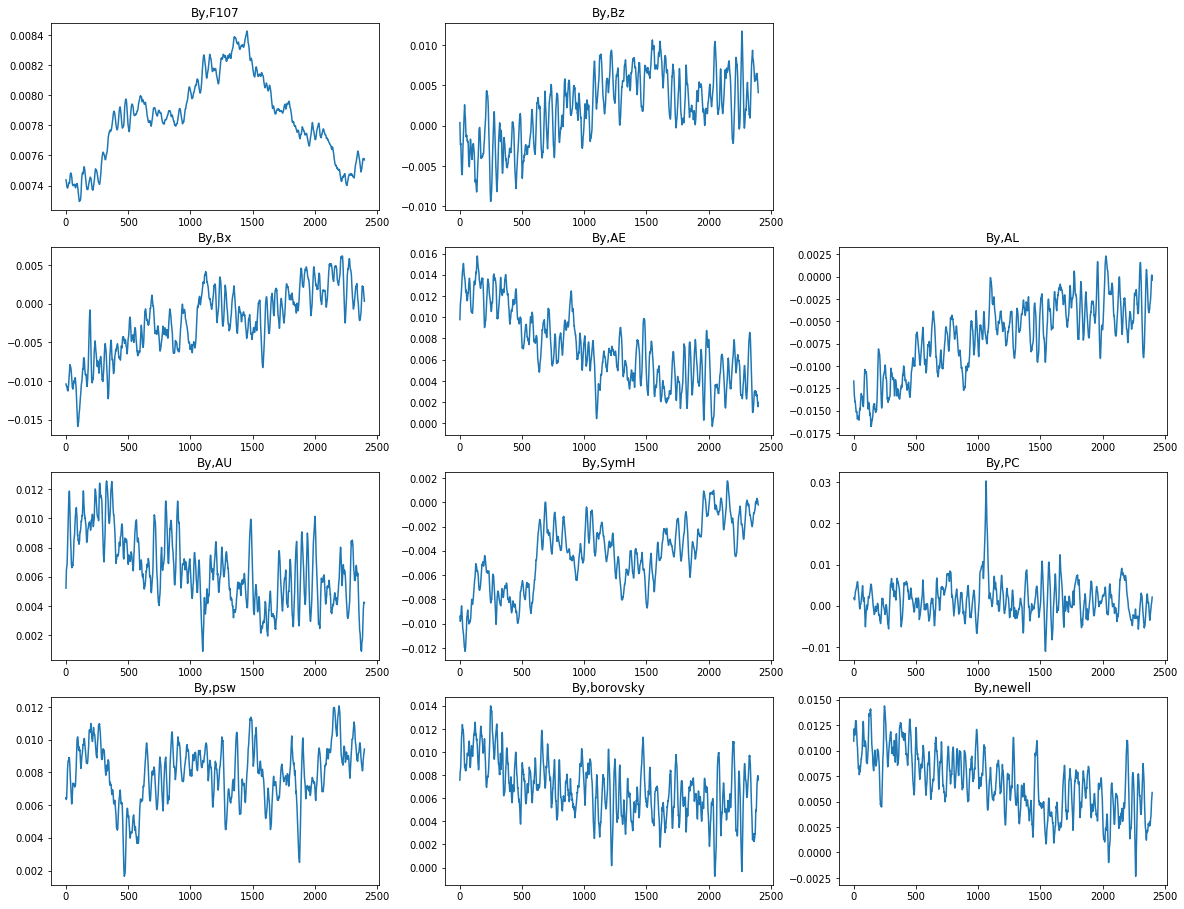

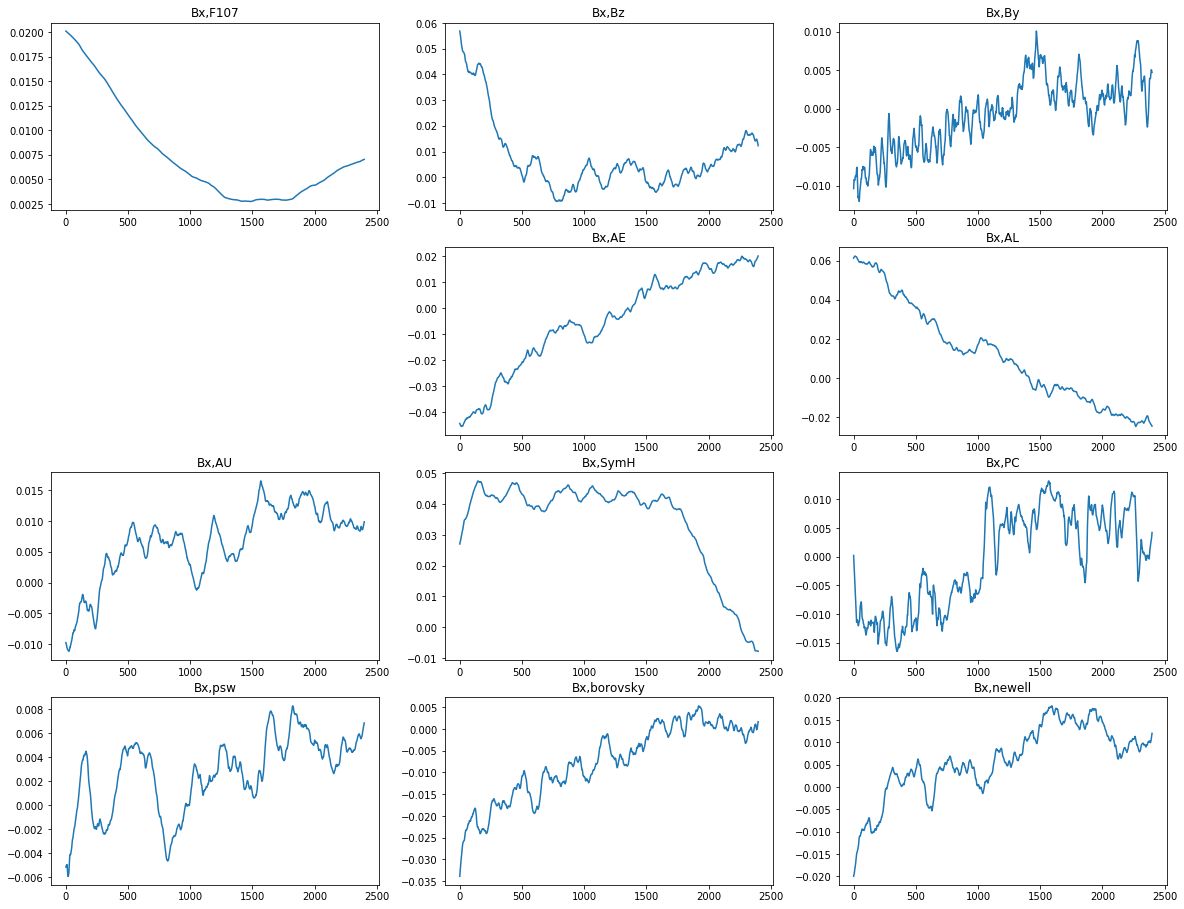

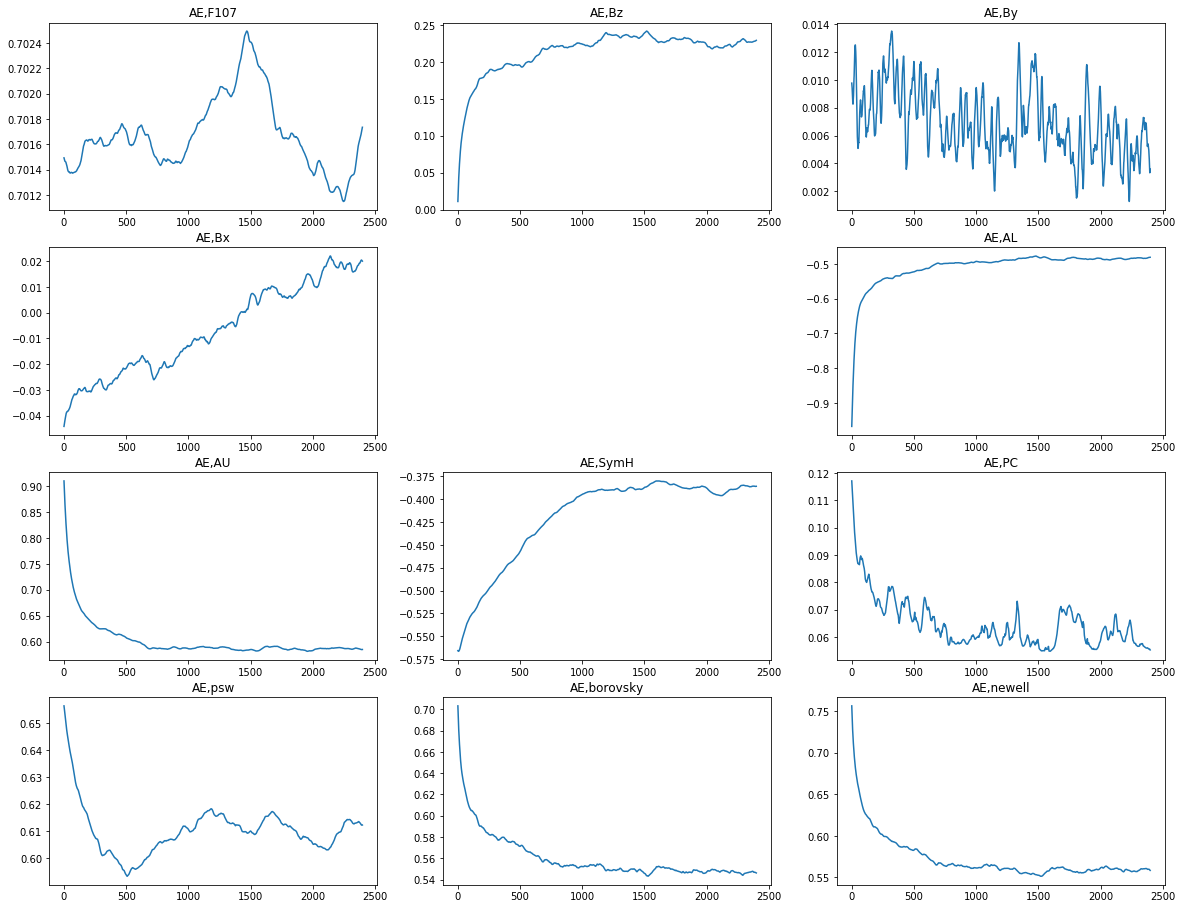

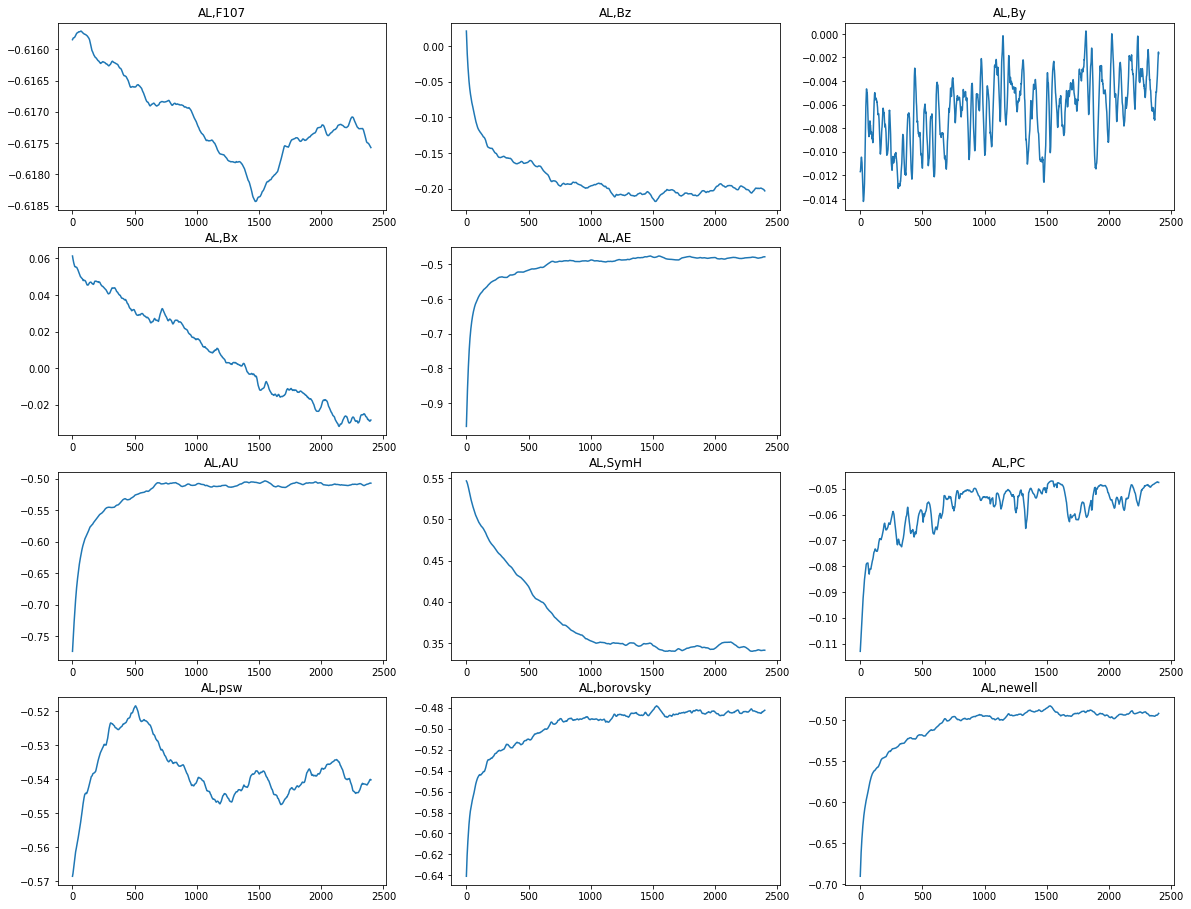

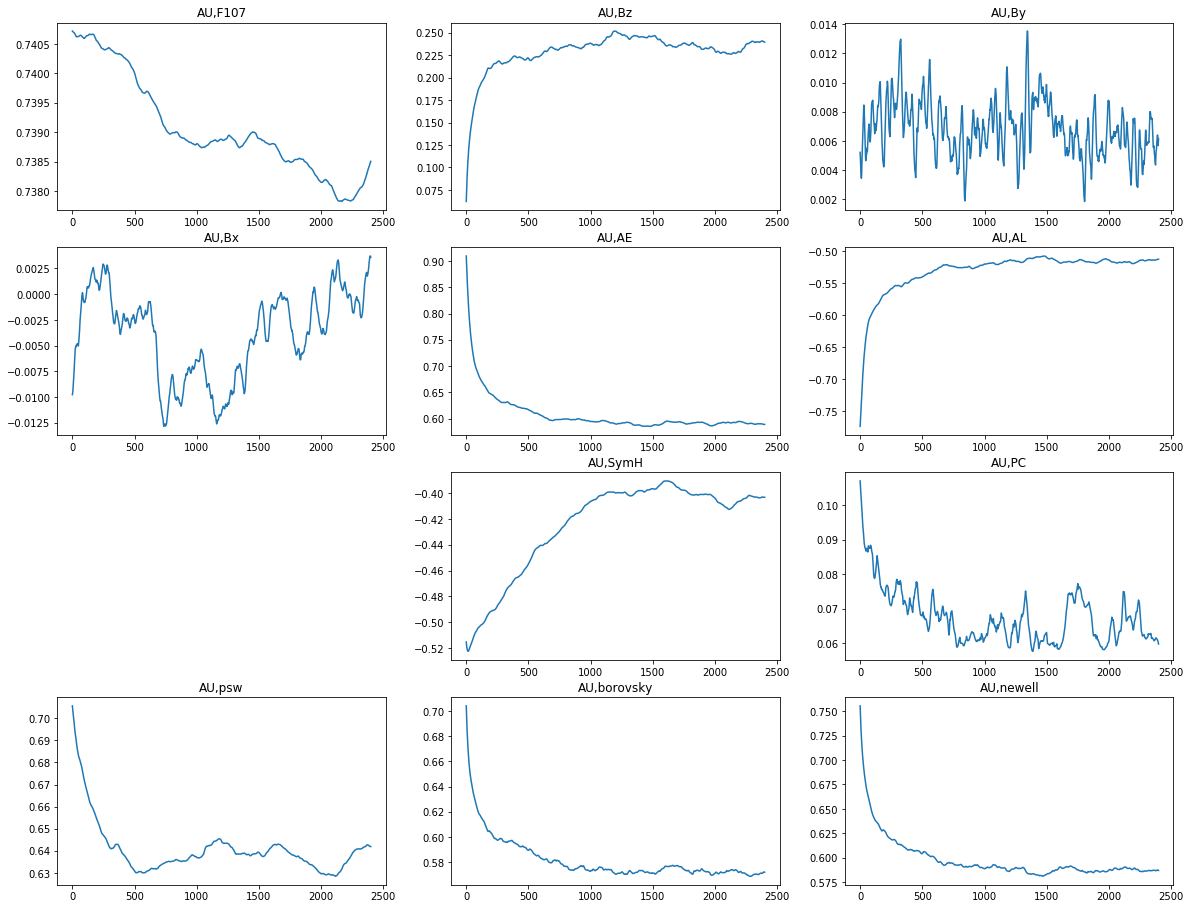

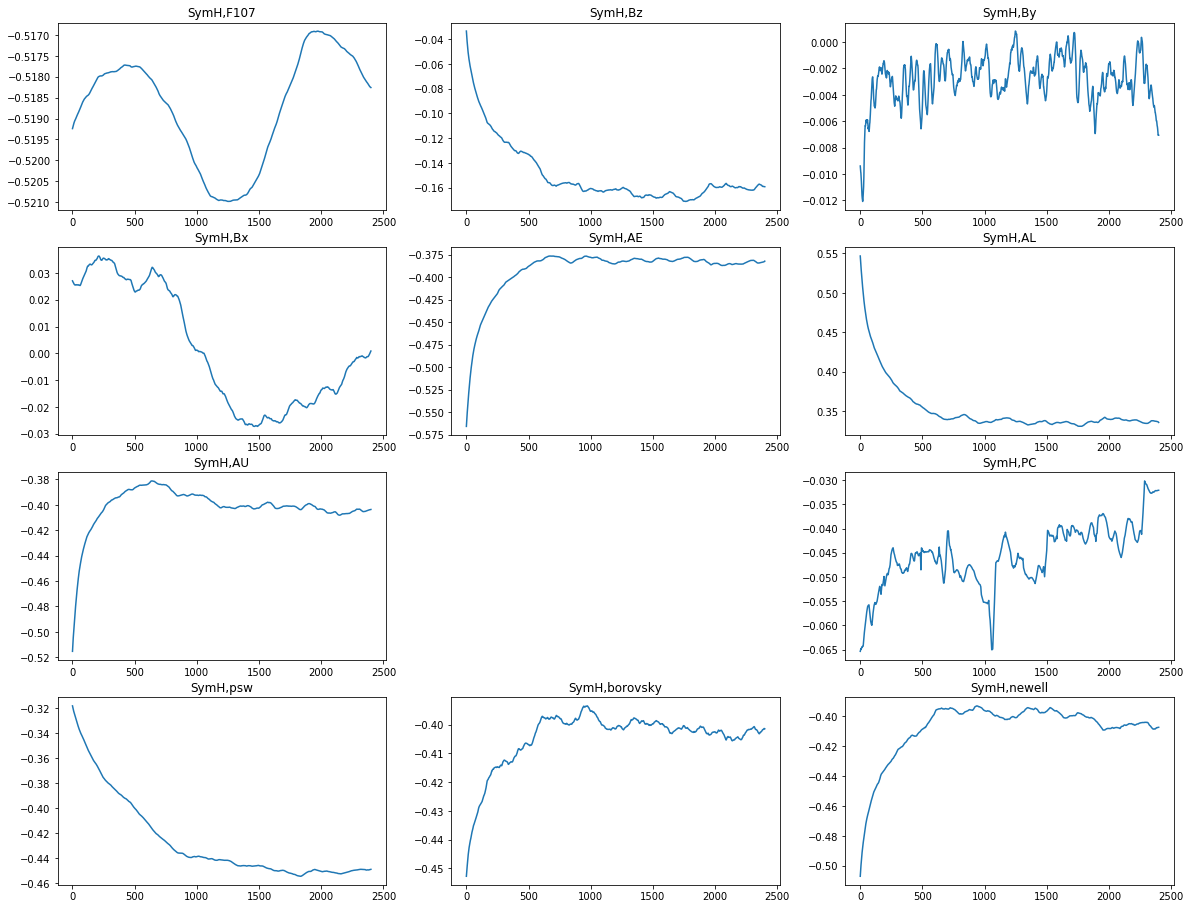

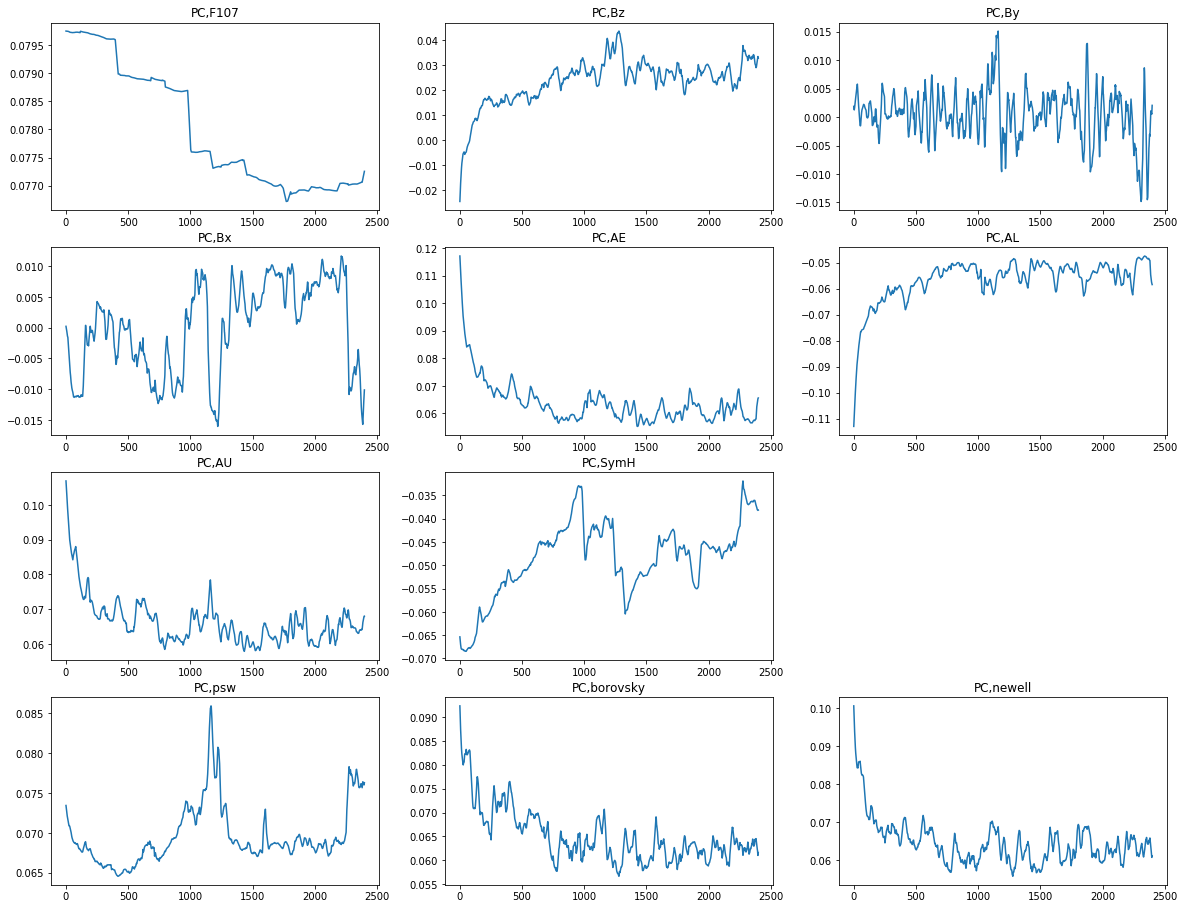

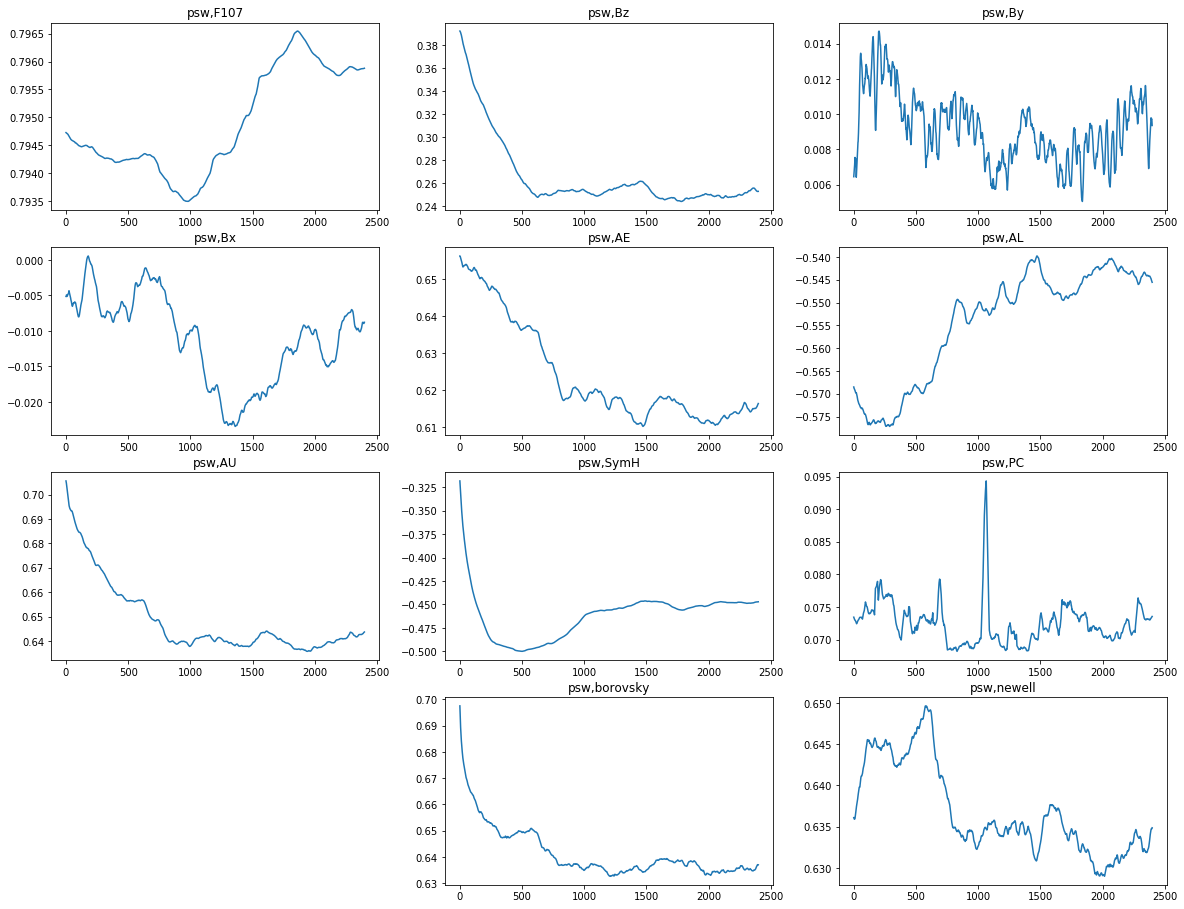

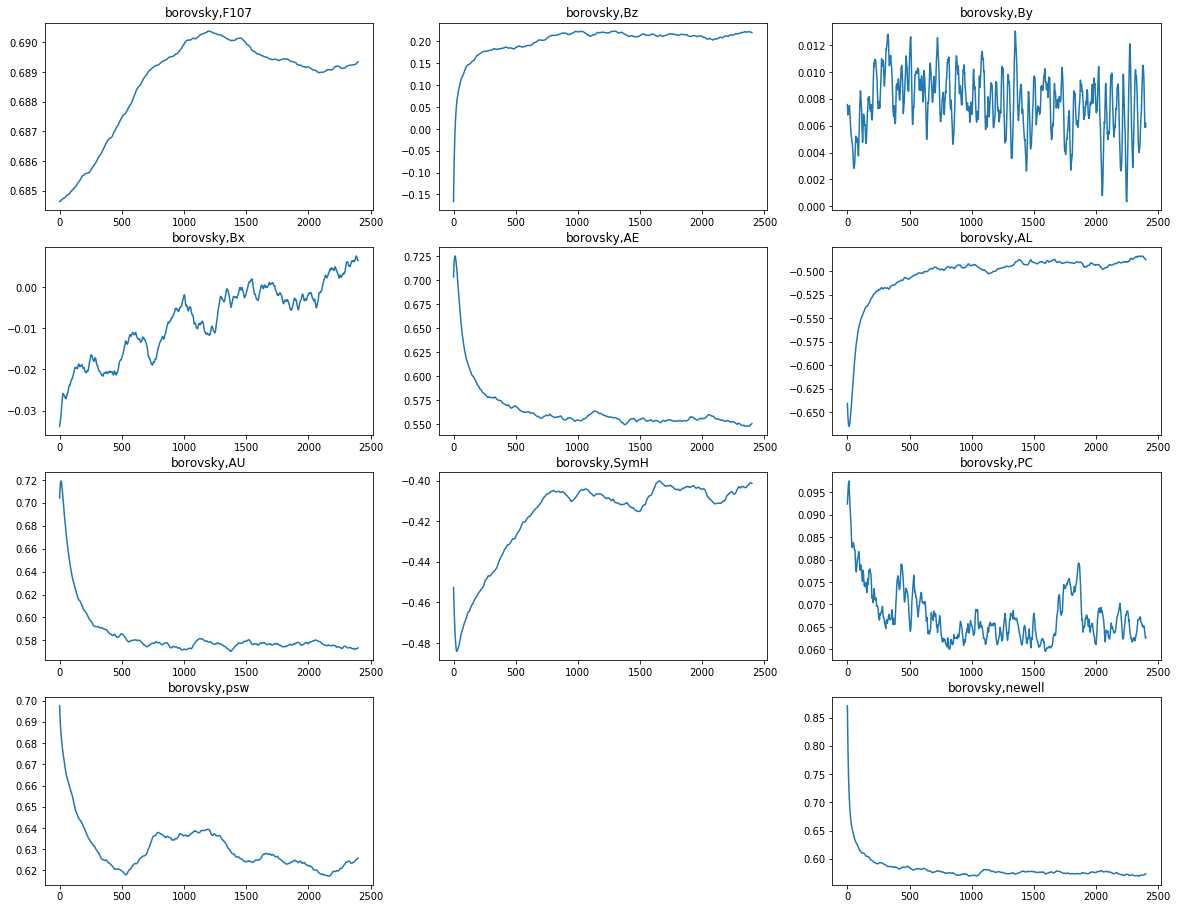

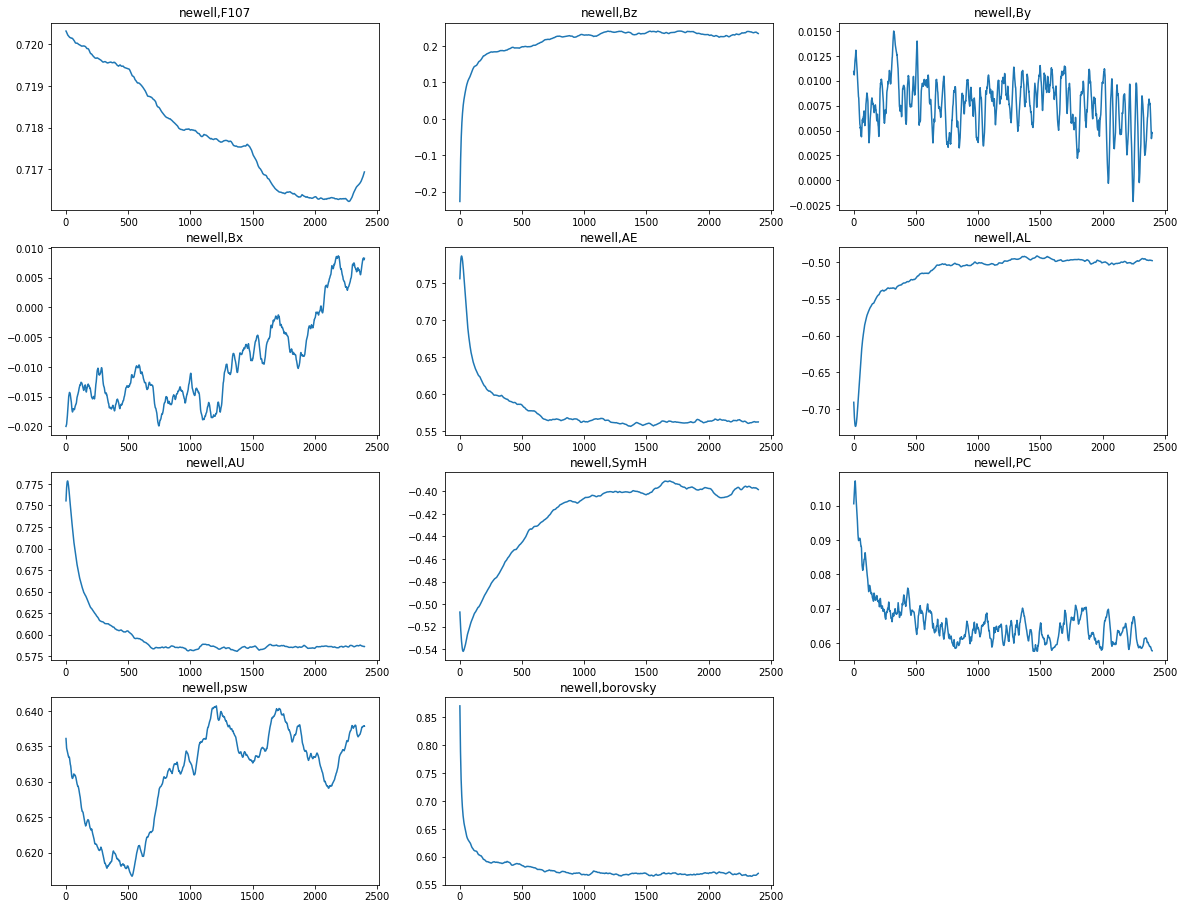

In [65]:
for m in range(len(names)):
    fig = plt.figure(figsize=(20,20))
    for i in range(len(names)):
        if m!=i:
            plt.subplot(5,3,int(i+1))     
            plt.plot(cross_cor[m,i,:])
            plt.title(names[m]+','+names[i])
            #plt.ylim(-1,1)

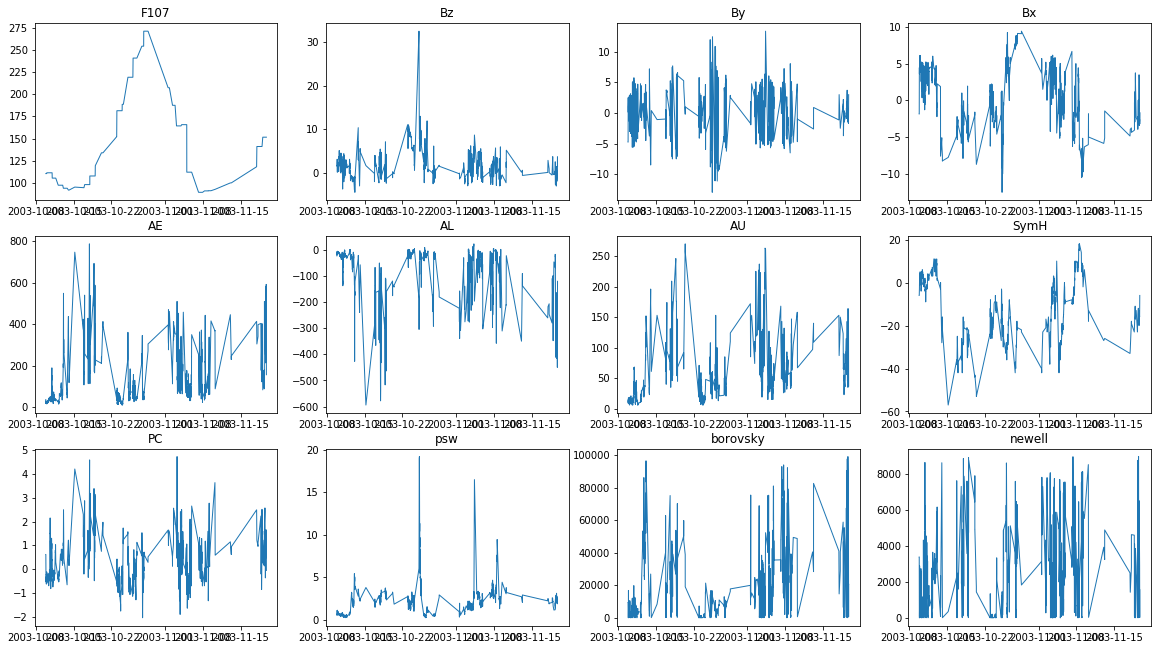

In [72]:
j=0
fig = plt.figure(figsize=(20,15))

for i in names:
    j=j+1
    plt.subplot(4,4,int(j))     

    plt.plot(df_cumulative[i][int(df_cumulative.shape[0]*38/100):int(df_cumulative.shape[0]*39/100)],linewidth=1)
    plt.title(i)
